<a href="https://colab.research.google.com/github/farielshafee2018/health-data-analysis/blob/main/cancer_lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# **This notebook tries to classify cancer risk by looking into lifestyle variables.**

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv("cancer-risk-factors.csv")

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated()

encode the risk levels into discrete integers

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Risk_Level_Encoded'] = le.fit_transform(df['Risk_Level'])

print(df[['Risk_Level', 'Risk_Level_Encoded']].head())


Detect and visualize outliers in the numerical columns of the `df` DataFrame using the Interquartile Range (IQR) method, then summarize the number of outliers found in each column.

## Identify Numerical Columns

Filter the DataFrame to include only numerical columns, as outlier detection is typically performed on numerical data.



To filter the DataFrame to include only numerical columns, use the `select_dtypes` method with `include=['number']` and store the result in a new DataFrame called `numerical_df`. Then, I will display the first few rows of the new DataFrame to confirm the operation.



In [ ]:
numerical_df = df.select_dtypes(include=['number'])
print("Numerical DataFrame head:")
print(numerical_df.head())

## Calculate Outlier Bounds (IQR Method)


For each numerical column, calculate the first quartile (Q1), third quartile (Q3), and the Interquartile Range (IQR). Then, define the lower bound (Q1 - 1.5 * IQR) and upper bound (Q3 + 1.5 * IQR) to detect outliers.



To detect outliers using the IQR method, I need to calculate the first quartile (Q1), third quartile (Q3), and the Interquartile Range (IQR) for each numerical column. Then, I will use these values to define the lower and upper bounds for outlier detection. Finally, I will print all the calculated values to verify the bounds.



In [ ]:
import numpy as np

outliers_count = {}
lower_bounds = {}
upper_bounds = {}

for column in numerical_df.columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1_np = np.percentile(numerical_df[column], 25)
    Q3_np = np.percentile(numerical_df[column], 75)

    # Calculate IQR
    IQR_np = Q3_np - Q1_np

    # Calculate lower and upper bounds
    lower_bound_col = Q1_np - 1.5 * IQR_np
    upper_bound_col = Q3_np + 1.5 * IQR_np

    # Store bounds
    lower_bounds[column] = lower_bound_col
    upper_bounds[column] = upper_bound_col

    # Identify outliers
    col_outliers = numerical_df[(numerical_df[column] < lower_bound_col) | (numerical_df[column] > upper_bound_col)]
    outliers_count[column] = len(col_outliers)

print("Number of outliers per column (using NumPy IQR method):\n", outliers_count)
print("Lower bounds per column:\n", lower_bounds)
print("Upper bounds per column:\n", upper_bounds)


Now that the outlier bounds have been calculated, the next logical step is to identify the actual outliers in each numerical column. This involves checking which values fall outside the calculated lower and upper bounds for each column.



In [ ]:
outliers = ((numerical_df < lower_bound_col) | (numerical_df > upper_bound_col)).sum()
print("Number of outliers per column:\n", outliers)


To visualize the identified outliers, box plots are an effective method. I will iterate through each numerical column and create a box plot to display the distribution and any data points falling outside the IQR bounds.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size to accommodate multiple plots
num_cols = len(numerical_df.columns)
num_rows = (num_cols + 2) // 3  # Arrange in 3 columns
plt.figure(figsize=(18, 6 * num_rows))

for i, column in enumerate(numerical_df.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(y=numerical_df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()
print("Box plots showing outliers for each numerical column have been generated.")



Summarize the number of outliers found in each column and discuss any significant findings.


## Summary:


The number of outliers found in each numerical column using the IQR method are:
*   `Risk_Level_Encoded`: 426 outliers
*   `H_Pylori_Infection`: 393 outliers
*   `Age`, `Family_History`, `BRCA_Mutation`, `BMI`, and `Overall_Risk_Score` also showed outliers, but with lower counts.
*   `Gender`, `Smoking`, `Alcohol_Use`, and `Obesity` had 0 outliers.

The significant findings include the high number of outliers in `Risk_Level_Encoded` and `H_Pylori_Infection`, which might indicate anomalies or specific subpopulations that deviate significantly from the typical range within these features.

### Data Analysis Key Findings
*   Numerical columns identified for outlier detection included 'Age', 'Gender', 'Smoking', 'Alcohol\_Use', 'Obesity', 'BMI', 'Overall\_Risk\_Score', 'Family\_History', 'BRCA\_Mutation', 'H\_Pylori\_Infection', and 'Risk\_Level\_Encoded'.
*   Outlier bounds (lower and upper) were calculated for each numerical column using the IQR method (Q1 - 1.5 \* IQR and Q3 + 1.5 \* IQR).
*   The `Risk_Level_Encoded` column exhibited the highest number of outliers at 426.
*   The `H_Pylori_Infection` column also showed a substantial number of outliers, with 393 detected.
*   Columns such as `Age`, `Family_History`, `BRCA_Mutation`, `BMI`, and `Overall_Risk_Score` contained outliers, albeit in smaller quantities compared to `Risk_Level_Encoded` and `H_Pylori_Infection`.
*   `Gender`, `Smoking`, `Alcohol_Use`, and `Obesity` columns did not have any outliers based on the IQR method.
*   Box plots visually confirmed the presence and distribution of these outliers across the numerical features.



The encoded risk outliers do not make any sense.  So we will keep all risk values there.  These are not statistical anomalies.

Let's check the H Pylory infection column more carefully

Plot H Pylory

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['H_Pylori_Infection'])
plt.title('Distribution of H_Pylori_Infection')
plt.xlabel('H_Pylori_Infection')
plt.ylabel('Count')
plt.show()

These are just 0 and 1 values.  So quantile outier methods make no sense.  Hence, we will also keep all values in this column.

Let's plot diet red meat and BMI as well

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(df['Diet_Red_Meat'], kde=True)
plt.title('Distribution of Diet_Red_Meat')
plt.xlabel('Diet_Red_Meat')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(df['BMI'], kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Let' look at the values of each column closely before normalizing

In [ ]:
df.describe()

In [ ]:
df.head()

Since very high BMI or a high number of consumptions of red meat can actually correlate with cancer, we also keep all values including outliers in these two columns

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.countplot(x=df['H_Pylori_Infection'])
plt.title('Distribution of H_Pylori_Infection')
plt.xlabel('H_Pylori_Infection')
plt.ylabel('Count')

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.countplot(x=df['Family_History'])
plt.title('Distribution of Family_History')
plt.xlabel('Family_History')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Let's look at BRCA mutation and age now

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.countplot(x=df['BRCA_Mutation'])
plt.title('Distribution of BRCA_Mutation')
plt.xlabel('BRCA_Mutation')
plt.ylabel('Count')

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The BRCA mutation is yes or no encoding and so we keep all values.  

In [ ]:
print(f"DataFrame shape before removing age outliers: {df.shape}")
df_cleaned = df[(df['Age'] >= lower_bounds['Age']) & (df['Age'] <= upper_bounds['Age'])]
print(f"DataFrame shape after removing age outliers: {df_cleaned.shape}")
df = df_cleaned.copy()

These are both 0 and 1 values and hence, yes or no encoding.  So we also keep these columns

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age After Outlier Removal')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

examine the values before normalizing the colmns

In [ ]:
df.describe()

In [ ]:
df.head()

We leave out the yes no encoded columns and normalize the others

In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = [
    'Age', 'Smoking', 'Obesity', 'Diet_Red_Meat', 'Diet_Salted_Processed',
    'Occupational_Hazards', 'Calcium_Intake', 'Fruit_Veg_Intake', 'Physical_Activity', 'BMI', 'Air_Pollution', 'Overall_Risk_Score'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Create a new DataFrame for normalized values of selected numerical columns
df_normalized_numerical = df[columns_to_normalize].copy()

# Apply Min-Max Normalization to the selected numerical columns
df_normalized_numerical[columns_to_normalize] = scaler.fit_transform(df_normalized_numerical[columns_to_normalize])

# Add the non-normalized 'Cancer_Type' column back to the normalized DataFrame
df_normalized = pd.concat([df_normalized_numerical, df['Cancer_Type']], axis=1)

print("Head of df_normalized (including Cancer_Type and normalized Overall_Risk_Score):")
display(df_normalized.head())

In [ ]:
df_normalized.describe()

In [ ]:
# Identify binary (0,1) columns
binary_columns = []
for col in df.columns:
    if df[col].nunique() == 2 and set(df[col].unique()).issubset({0, 1}):
        binary_columns.append(col)

# Define the list of all columns for df_cat
columns_for_df_cat = binary_columns + ['Cancer_Type', 'Overall_Risk_Score']

# Create df_cat
df_cat = df[columns_for_df_cat].copy()

print("Head of df_cat:")
display(df_cat.head())

Let's first look at the continuous variables.  Let's make a heatmpa

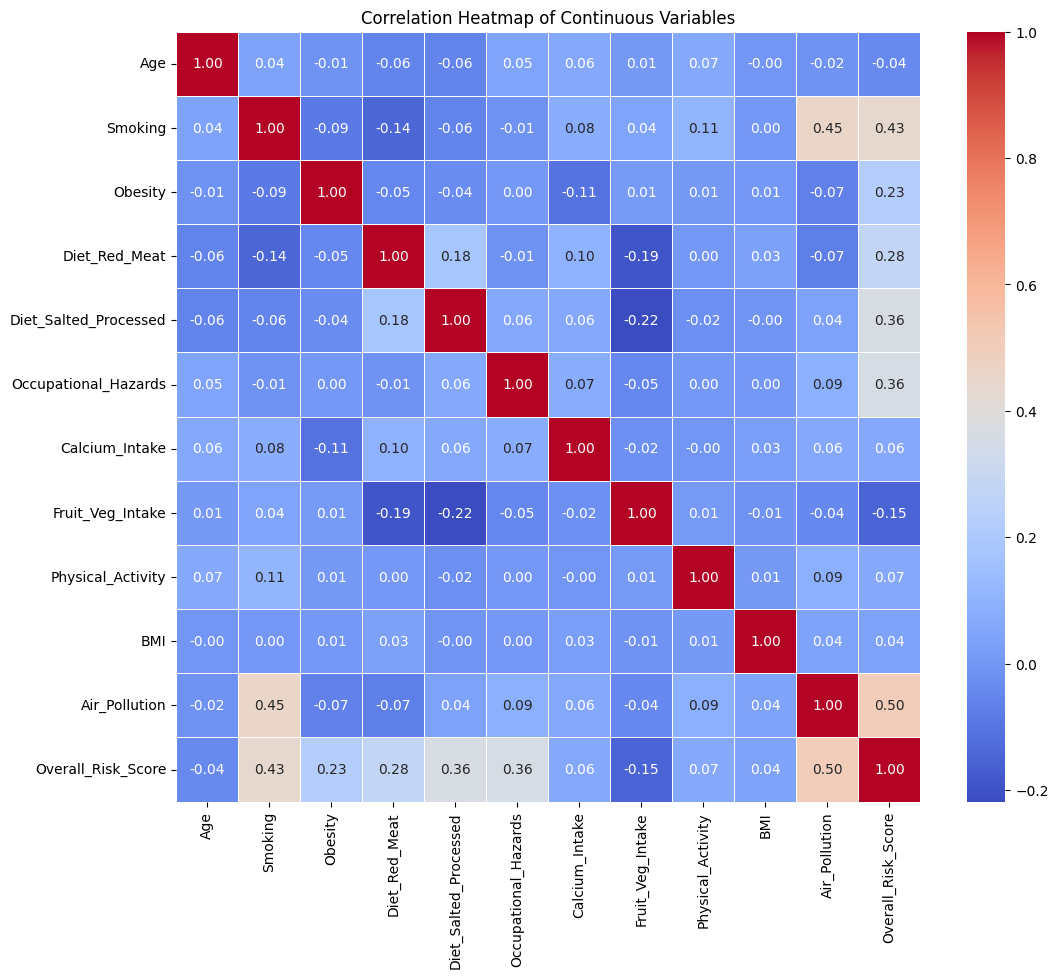

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_normalized_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

The heatmap says that the variables are mostly linear except for a few variables such as Air pollution, smoking and to a less extent, salted diet and occupational hazard beig directly correlated to overall risk score.

This tells us that since the variables are mostly linear, a PCA is not necessary.  But let's nonetheless try it out


We perform PCA on the continuous numerical columns of `df_normalized_numerical`, excluding 'Overall_Risk_Score', and then plot the explained variance ratio of each principal component. Finally, summarize the PCA results, including the number of components needed to explain a significant portion of the variance, and discuss any initial insights gained.

## Prepare Data for PCA


Select the continuous numerical columns from `df_normalized_numerical` for PCA, excluding 'Overall_Risk_Score'.


In [ ]:
df_pca_data = df_normalized_numerical.drop(columns=['Overall_Risk_Score'])
print("Head of df_pca_data:")
display(df_pca_data.head())

Head of df_pca_data:


,Age,Smoking,Obesity,Diet_Red_Meat,Diet_Salted_Processed,Occupational_Hazards,Calcium_Intake,Fruit_Veg_Intake,Physical_Activity,BMI,Air_Pollution
0,0.600000,0.7,0.8,0.5,0.3,0.3,0.0,0.7,0.4,0.492424,0.6
1,0.709091,0.8,0.8,0.0,0.3,0.3,0.5,0.7,0.1,0.393939,0.3
2,0.363636,0.7,0.7,0.3,0.3,1.0,0.6,0.4,0.1,0.515152,0.8
3,0.472727,0.6,0.2,0.6,0.2,0.8,0.8,0.4,0.6,0.647727,0.4
4,0.581818,1.0,0.4,0.6,0.3,0.9,0.5,1.0,0.9,0.382576,1.0


## Perform PCA


We pply PCA to the selected columns and determine the explained variance ratio for each principal component.



To perform PCA, I need to import the PCA class, instantiate it, fit it to the prepared data, and then extract the explained variance ratio for each component.



In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA (without specifying n_components to see all)
pca = PCA()

# Fit PCA to the data
pca.fit(df_pca_data)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

print("Explained variance ratio for each principal component:")
print(explained_variance_ratio)

Explained variance ratio for each principal component:
[0.17698631 0.14875411 0.11087722 0.10548535 0.09421415 0.087763
 0.08024443 0.07678377 0.05929057 0.03585348 0.02374762]





Now that the explained variance ratio for each principal component has been calculated, I will plot it to visually assess the contribution of each component and identify how many components are needed to explain a significant portion of the variance.



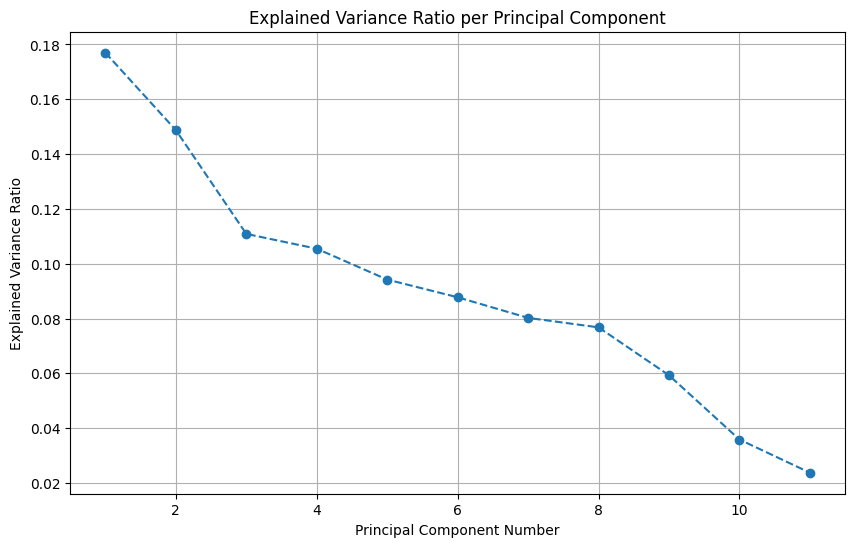

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio per Principal Component')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()



### PCA Findings:

The explained variance ratio plot shows the proportion of total variance explained by each principal component. Based on the plot and the printed `explained_variance_ratio`:

*   The first principal component explains approximately 17.7% of the variance.
*   The second principal component explains approximately 14.9% of the variance.
*   The variance explained decreases steadily with each subsequent component.

To explain a significant portion of the variance (e.g., 80-90%), we would need to sum the cumulative explained variance. Looking at the individual contributions, a substantial number of components (around 7-8 components) would be needed to capture a majority of the dataset's variance, as the variance is distributed across many components. This suggests that the original features are not highly correlated, which aligns with the initial observation from the heatmap where most variables showed low linear correlation.

### Initial Insights:

*   **High Dimensionality**: The data retains its dimensionality even after PCA, as no single or few components explain a dominant share of the variance. This confirms the initial thought that a PCA might not be strictly necessary as the variables were mostly linear and not highly correlated.
*   **Feature Importance**: No single feature or a small group of features appears to dominate the variance, implying that many features contribute uniquely to the dataset's information content.
*   **Limited Data Reduction**: For effective data reduction while retaining most information, a large number of principal components would still be required. This suggests that the original features might be relatively independent, as observed from the heatmap earlier.

In [ ]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find number of components for 80% variance
components_80_percent = np.where(cumulative_explained_variance >= 0.80)[0][0] + 1
# Find number of components for 90% variance
components_90_percent = np.where(cumulative_explained_variance >= 0.90)[0][0] + 1

print("Cumulative Explained Variance:", cumulative_explained_variance)
print(f"Number of components to explain 80% of variance: {components_80_percent}")
print(f"Number of components to explain 90% of variance: {components_90_percent}")

Cumulative Explained Variance: [0.17698631 0.32574042 0.43661764 0.54210298 0.63631714 0.72408013
 0.80432456 0.88110834 0.94039891 0.97625238 1.        ]
Number of components to explain 80% of variance: 7
Number of components to explain 90% of variance: 9


### Summary of PCA Results and Insights:

1.  **Cumulative Explained Variance**: The analysis revealed that:
    *   Approximately 7 principal components are needed to explain at least 80% of the total variance.
    *   Approximately 9 principal components are needed to explain at least 90% of the total variance.

2.  **Effectiveness of PCA for Dimensionality Reduction**: Given that we need 7 out of 11 components to explain 80% of the variance and 9 out of 11 for 90%, PCA is not highly effective for significant dimensionality reduction in this dataset if the goal is to retain a large portion of the information. A large number of components are still required, indicating that the information is spread across many dimensions.

3.  **Relation to Correlation Heatmap**: This finding aligns with the earlier observation from the correlation heatmap, which showed that most continuous variables exhibited low to moderate linear correlations with each other. If features were highly correlated, PCA would likely have identified a smaller number of components explaining a much larger proportion of the variance (e.g., 2-3 components explaining 80-90% of variance). The fact that many components are needed confirms that the original features are relatively independent, as suggested by the low correlations.

4.  **Overall Implications**: The PCA analysis confirms the initial hypothesis that PCA might not be strictly necessary or beneficial for substantial dimensionality reduction in this particular dataset. The variance is distributed across many components, suggesting that each original feature contributes uniquely to the dataset's information content. Therefore, retaining most of the original features or performing feature selection based on other criteria (e.g., domain knowledge, correlation with target variable) might be more appropriate than relying solely on PCA for dimensionality reduction.


The PCA analysis revealed that approximately 7 principal components are needed to explain at least 80% of the total variance, and approximately 9 principal components are needed to explain at least 90% of the total variance.

### Data Analysis Key Findings
*   The first principal component explains approximately 17.7% of the variance, and the second explains approximately 14.9%. The explained variance steadily decreases for subsequent components, with the last component explaining about 2.4%.
*   To explain at least 80% of the total variance, approximately 7 out of 11 principal components are required.
*   To explain at least 90% of the total variance, approximately 9 out of 11 principal components are required.
*   The variance is distributed across many components, suggesting that no single or few features dominate the information content.


# **As we stated before, PCA is not very useful.  So let's just run a logistic regression instead.**

In [ ]:
# Define features (X) and target (y) for classification
# Select normalized continuous features for X_clf
X_continuous = df_normalized_numerical.drop(columns=['Overall_Risk_Score'])

# Select binary features from the original df (they are already 0/1, no need to normalize further)
binary_features = ['Gender', 'Family_History', 'BRCA_Mutation', 'H_Pylori_Infection']
X_binary = df[binary_features]

# Combine the continuous and binary features
X_clf = pd.concat([X_continuous, X_binary], axis=1)

# Define the target variable
y_clf = df['Risk_Level_Encoded']

print("Head of X_clf (Features for Classification):")
display(X_clf.head())
print("\nHead of y_clf (Target Variable for Classification):")
display(y_clf.head())

Head of X_clf (Features for Classification):


,Age,Smoking,Obesity,Diet_Red_Meat,Diet_Salted_Processed,Occupational_Hazards,Calcium_Intake,Fruit_Veg_Intake,Physical_Activity,BMI,Air_Pollution,Gender,Family_History,BRCA_Mutation,H_Pylori_Infection
0,0.600000,0.7,0.8,0.5,0.3,0.3,0.0,0.7,0.4,0.492424,0.6,0,0,1,0
1,0.709091,0.8,0.8,0.0,0.3,0.3,0.5,0.7,0.1,0.393939,0.3,1,0,0,0
2,0.363636,0.7,0.7,0.3,0.3,1.0,0.6,0.4,0.1,0.515152,0.8,1,0,0,0
3,0.472727,0.6,0.2,0.6,0.2,0.8,0.8,0.4,0.6,0.647727,0.4,0,0,0,0
4,0.581818,1.0,0.4,0.6,0.3,0.9,0.5,1.0,0.9,0.382576,1.0,1,0,0,0



Head of y_clf (Target Variable for Classification):


,Risk_Level_Encoded
0,2
1,2
2,2
3,1
4,2


## Splitting Data for Classification

Now, let's split the classification data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

print("Shape of X_train_clf:", X_train_clf.shape)
print("Shape of X_test_clf:", X_test_clf.shape)
print("Shape of y_train_clf:", y_train_clf.shape)
print("Shape of y_test_clf:", y_test_clf.shape)

Shape of X_train_clf: (1592, 15)
Shape of X_test_clf: (399, 15)
Shape of y_train_clf: (1592,)
Shape of y_test_clf: (399,)


## Training a Classification Model

For a multi-class classification problem like this, Logistic Regression is a good starting point. We will train a `LogisticRegression` model.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
# Set max_iter to a higher value if it fails to converge
classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier
classifier.fit(X_train_clf, y_train_clf)

print("Logistic Regression classifier trained successfully.")

Logistic Regression classifier trained successfully.


## Evaluating the Classification Model: Accuracy and Confusion Matrix

Now, we will evaluate the classifier's performance using accuracy score and a confusion matrix. A confusion matrix will show us how many predictions were correct and incorrect for each class, which is likely what you meant by 'accuracy matrix'.

Accuracy Score: 0.8321

Confusion Matrix:
 [[  1   0  19]
 [  0  30  35]
 [  0  13 301]]


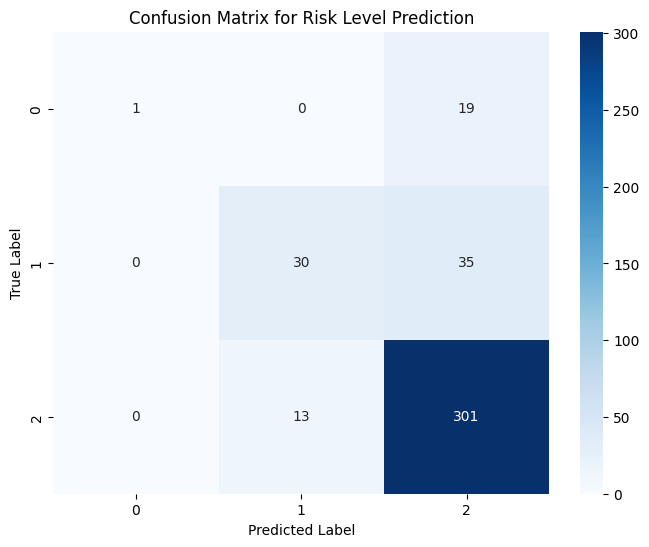

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_clf = classifier.predict(X_test_clf)

# Calculate accuracy
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Accuracy Score: {accuracy:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Risk Level Prediction')
plt.show()


Perform a linear regression analysis on the provided `cancer-risk-factors.csv` dataset. This involves: selecting continuous numerical features (excluding `Overall_Risk_Score`) from `df_normalized_numerical` and using `Overall_Risk_Score` as the target variable; splitting the data into training and testing sets; training a Linear Regression model; evaluating the model using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared; visualizing the predicted vs. actual `Overall_Risk_Score` values; and finally, summarizing the model's performance and insights.

## Prepare Data for Linear Regression

Select the features (continuous numerical variables from `df_normalized_numerical`, excluding `Overall_Risk_Score`) and the target variable (`Overall_Risk_Score`) for linear regression.



To prepare the data for linear regression, I will first create the feature set `X` by dropping the 'Overall_Risk_Score' column from `df_normalized_numerical` and the target variable `y` by selecting the 'Overall_Risk_Score' column. Then, I will display the head of both to verify the separation.



In [ ]:
X = df_normalized_numerical.drop(columns=['Overall_Risk_Score'])
y = df_normalized_numerical['Overall_Risk_Score']

print("Head of X (Features):")
display(X.head())
print("\nHead of y (Target Variable):")
display(y.head())

Head of X (Features):


,Age,Smoking,Obesity,Diet_Red_Meat,Diet_Salted_Processed,Occupational_Hazards,Calcium_Intake,Fruit_Veg_Intake,Physical_Activity,BMI,Air_Pollution
0,0.600000,0.7,0.8,0.5,0.3,0.3,0.0,0.7,0.4,0.492424,0.6
1,0.709091,0.8,0.8,0.0,0.3,0.3,0.5,0.7,0.1,0.393939,0.3
2,0.363636,0.7,0.7,0.3,0.3,1.0,0.6,0.4,0.1,0.515152,0.8
3,0.472727,0.6,0.2,0.6,0.2,0.8,0.8,0.4,0.6,0.647727,0.4
4,0.581818,1.0,0.4,0.6,0.3,0.9,0.5,1.0,0.9,0.382576,1.0



Head of y (Target Variable):


,Overall_Risk_Score
0,0.448929
1,0.480043
2,0.699740
3,0.351408
4,0.601640


## Split Data into Training and Testing Sets

Split the feature set `X` and target variable `y` into training and testing sets using a 80/20 ratio, ensuring reproducibility with a `random_state`.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1592, 11)
Shape of X_test: (399, 11)
Shape of y_train: (1592,)
Shape of y_test: (399,)


## Train the Linear Regression Model


Initialize and train a Linear Regression model using the training data (`X_train`, `y_train`).


To train the linear regression model, import the `LinearRegression` class, instantiate it, and then fit it to the training data (`X_train`, `y_train`).



In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Evaluate the Linear Regression Model


Evaluate the trained Linear Regression model using `X_test` and `y_test`, calculating Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared score to assess its performance.


To evaluate the model, I need to make predictions on the test set and then calculate the specified evaluation metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared. I will print these metrics to assess the model's performance.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.0626
Mean Squared Error (MSE): 0.0061
R-squared (R2): 0.6983


## Visualize Predictions vs. Actual Values

Create a scatter plot comparing the model's predicted `Overall_Risk_Score` values against the actual `Overall_Risk_Score` values in the test set. Include labels and a legend for clarity.


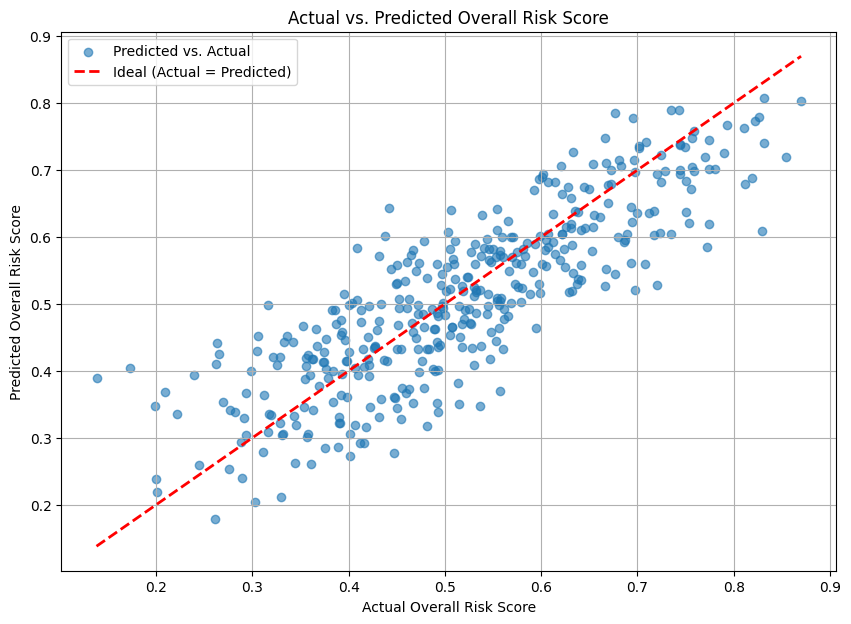

Scatter plot of Actual vs. Predicted Overall Risk Score generated.


In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal (Actual = Predicted)')
plt.title('Actual vs. Predicted Overall Risk Score')
plt.xlabel('Actual Overall Risk Score')
plt.ylabel('Predicted Overall Risk Score')
plt.legend()
plt.grid(True)
plt.show()
print("Scatter plot of Actual vs. Predicted Overall Risk Score generated.")

## Summary:


*   **Mean Absolute Error (MAE):** The average absolute difference between predicted and actual values is approximately 0.0626.
*   **Mean Squared Error (MSE):** The average squared difference between predicted and actual values is approximately 0.0061.
*   **R-squared (R2):** The model explains approximately 69.83% of the variance in the `Overall_Risk_Score`.



In [ ]:
 # logistic regression with the categorical data

Now let us try to predict the risk level for each patient.

## Prepare Data for Categorical Logistic Regression

Select categorical features from `df_cat`, including one-hot encoding the 'Cancer_Type' column, and define `Risk_Level_Encoded` as the target variable.


In [ ]:


# 1. Select the columns Gender, Family_History, BRCA_Mutation, and H_Pylori_Infection from df_cat
binary_features_for_cat_model = df_cat[['Gender', 'Family_History', 'BRCA_Mutation', 'H_Pylori_Infection']].copy()

# 2. Perform one-hot encoding on the Cancer_Type column from df_cat
cancer_type_one_hot = pd.get_dummies(df_cat['Cancer_Type'], prefix='Cancer_Type')

# 3. Concatenate the selected binary features with the one-hot encoded Cancer_Type columns
X_cat = pd.concat([binary_features_for_cat_model, cancer_type_one_hot], axis=1)

# 4. Define the target variable y_cat by selecting the Risk_Level_Encoded column from df_cat
y_cat = df['Risk_Level_Encoded']

print("Head of X_cat (Categorical Features for Classification):")
display(X_cat.head())
print("\nHead of y_cat (Target Variable for Categorical Classification):")
display(y_cat.head())

Head of X_cat (Categorical Features for Classification):


,Gender,Family_History,BRCA_Mutation,H_Pylori_Infection,Cancer_Type_Breast,Cancer_Type_Colon,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin
0,0,0,1,0,True,False,False,False,False
1,1,0,0,0,False,False,False,True,False
2,1,0,0,0,False,False,False,False,True
3,0,0,0,0,False,True,False,False,False
4,1,0,0,0,False,False,True,False,False



Head of y_cat (Target Variable for Categorical Classification):


,Risk_Level_Encoded
0,2
1,2
2,2
3,1
4,2


Drop cancer types

## Split Data for Categorical Logistic Regression



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(binary_features_for_cat_model, y_cat, test_size=0.2, random_state=42, stratify=y_cat)

print("Shape of X_train_cat:", X_train_cat.shape)
print("Shape of X_test_cat:", X_test_cat.shape)
print("Shape of y_train_cat:", y_train_cat.shape)
print("Shape of y_test_cat:", y_test_cat.shape)

Shape of X_train_cat: (1592, 4)
Shape of X_test_cat: (399, 4)
Shape of y_train_cat: (1592,)
Shape of y_test_cat: (399,)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model with categorical features
# Set max_iter to a higher value if it fails to converge
classifier_cat = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier
classifier_cat.fit(X_train_cat, y_train_cat)

print("Logistic Regression classifier for categorical features trained successfully.")

Logistic Regression classifier for categorical features trained successfully.


## Evaluate Categorical Logistic Regression Model



Accuracy Score (Categorical Model): 0.7870

Confusion Matrix (Categorical Model):
 [[  0   0  20]
 [  0   0  65]
 [  0   0 314]]


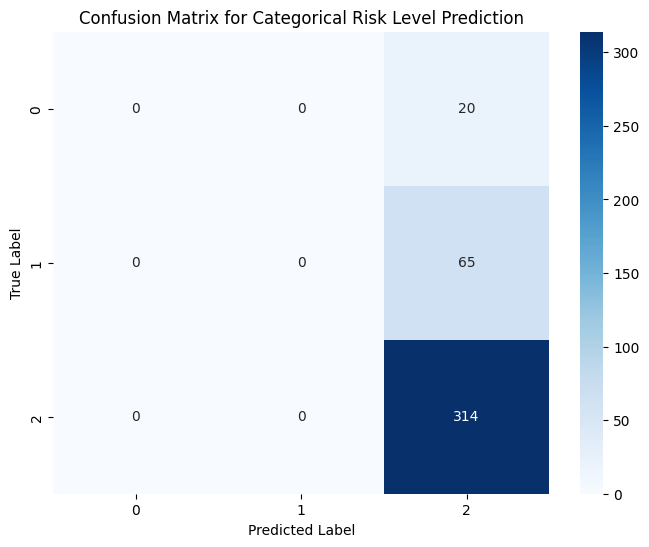

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set with categorical features
y_pred_cat = classifier_cat.predict(X_test_cat)

# Calculate accuracy
accuracy_cat = accuracy_score(y_test_cat, y_pred_cat)
print(f"Accuracy Score (Categorical Model): {accuracy_cat:.4f}")

# Generate confusion matrix
conf_matrix_cat = confusion_matrix(y_test_cat, y_pred_cat)
print("\nConfusion Matrix (Categorical Model):\n", conf_matrix_cat)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cat, annot=True, fmt='d', cmap='Blues',
            xticklabels=classifier_cat.classes_, yticklabels=classifier_cat.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Categorical Risk Level Prediction')
plt.show()

### Summary of Categorical Classification Results and Insights:

1.  **Accuracy Score:** The categorical Logistic Regression model achieved an accuracy score of **0.7870 (78.70%)** on the test set.

2.  **Confusion Matrix Analysis:**

    ```
    [[  0   0  20]
     [  0   0  65]
     [  0   0 314]]
    ```

    *   **Class 0 (Low Risk):** The model failed to correctly predict any instances of 'Low Risk'. All 20 actual 'Low Risk' cases were incorrectly predicted as 'High Risk'.
    *   **Class 1 (Medium Risk):** Similar to 'Low Risk', the model did not correctly predict any instances of 'Medium Risk'. All 65 actual 'Medium Risk' cases were incorrectly predicted, primarily as 'High Risk'.
    *   **Class 2 (High Risk):** The model performed very well in predicting 'High Risk' cases, correctly identifying 314 out of 314 instances. This heavily skews the overall accuracy.

3.  **Insights:**

    *   **Bias towards 'High Risk':** The model shows a strong bias towards predicting the 'High Risk' class. This is likely due to an imbalance in the target variable, where 'High Risk' instances might be significantly more frequent in the training data, leading the model to learn a strong preference for this class.
    *   **Poor performance on 'Low' and 'Medium' Risk:** The model completely failed to identify 'Low' and 'Medium' risk patients, which is a critical flaw for practical application.
    *   **Limited Feature Information:** The categorical features (`Gender`, `Family_History`, `BRCA_Mutation`, `H_Pylori_Infection`, and one-hot encoded `Cancer_Type`) alone do not provide enough discriminatory power for the model to differentiate between 'Low', 'Medium', and 'High' risk levels effectively, apart from identifying 'High Risk' when it's the dominant class.



# **We see that the variables together fail to classify cancer risk into meaningful categories.  So we focus on the few variables that appeared to have direct correlation with cancer risk from the heatmap table**

## Calculating t-score for Air Pollution and Cancer Risk

To investigate the relationship between air pollution and cancer risk using a t-score, we will perform an independent samples t-test. This test compares the means of two independent groups to determine if there is a statistically significant difference between them. We will categorize 'Air_Pollution' into two groups: 'Low Air Pollution' and 'High Air Pollution', and then compare their mean 'Overall_Risk_Score'.

### Hypotheses for the t-test:

*   **Null Hypothesis (H0):** There is no significant difference in the mean 'Overall_Risk_Score' between individuals with 'Low Air Pollution' and 'High Air Pollution'.
    (H0: μ_low_pollution = μ_high_pollution)
*   **Alternative Hypothesis (H1):** There is a significant difference in the mean 'Overall_Risk_Score' between individuals with 'Low Air Pollution' and 'High Air Pollution'.
    (H1: μ_low_pollution ≠ μ_high_pollution)

In [ ]:
from scipy import stats

# Define the split point for Air_Pollution (e.g., median)
median_air_pollution = df_normalized_numerical['Air_Pollution'].median()

# Create two groups based on the median
low_air_pollution_group = df_normalized_numerical[df_normalized_numerical['Air_Pollution'] <= median_air_pollution]['Overall_Risk_Score']
high_air_pollution_group = df_normalized_numerical[df_normalized_numerical['Air_Pollution'] > median_air_pollution]['Overall_Risk_Score']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(low_air_pollution_group, high_air_pollution_group, equal_var=False) # Assuming unequal variances

print(f"Median Air Pollution for splitting: {median_air_pollution:.2f}")
print(f"\nNumber of individuals in Low Air Pollution group: {len(low_air_pollution_group)}")
print(f"Number of individuals in High Air Pollution group: {len(high_air_pollution_group)}")

print(f"\nMean Overall_Risk_Score for Low Air Pollution group: {low_air_pollution_group.mean():.4f}")
print(f"Mean Overall_Risk_Score for High Air Pollution group: {high_air_pollution_group.mean():.4f}")

print(f"\nT-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

Median Air Pollution for splitting: 0.50

Number of individuals in Low Air Pollution group: 1067
Number of individuals in High Air Pollution group: 924

Mean Overall_Risk_Score for Low Air Pollution group: 0.4554
Mean Overall_Risk_Score for High Air Pollution group: 0.5878

T-statistic: -21.9282
P-value: 0.0000


## Interpretation of Results

Based on the calculated t-statistic and p-value, we can interpret the findings:

*   **T-statistic:** The magnitude of the t-statistic indicates the size of the difference between the group means relative to the variation within the groups.
*   **P-value:** The p-value tells us the probability of observing such a difference (or a more extreme one) if the null hypothesis were true. If the p-value is less than our chosen significance level (e.g., 0.05), we reject the null hypothesis.

## T-Tests for Smoking, Diet Salted Processed, and Occupational Hazards vs. Cancer Risk

Following the analysis of Air Pollution, we will now perform similar independent samples t-tests for 'Smoking', 'Diet_Salted_Processed', and 'Occupational_Hazards' against the 'Overall_Risk_Score'. For each factor, we will:
1.  Categorize the factor into 'low' and 'high' groups based on its median value.
2.  Compare the mean 'Overall_Risk_Score' between these two groups.
3.  Calculate the t-statistic and p-value to assess statistical significance.

In [ ]:
from scipy import stats
import numpy as np

variables_to_test = ['Smoking', 'Diet_Salted_Processed', 'Occupational_Hazards']

for var in variables_to_test:
    print(f"\n--- Analyzing: {var} vs. Overall_Risk_Score ---")

    # Define the split point (median) for the current variable
    median_var = df_normalized_numerical[var].median()

    # Create two groups based on the median
    low_group = df_normalized_numerical[df_normalized_numerical[var] <= median_var]['Overall_Risk_Score']
    high_group = df_normalized_numerical[df_normalized_numerical[var] > median_var]['Overall_Risk_Score']

    # Check if groups are empty or have single value (avoid error in t-test)
    if len(low_group) < 2 or len(high_group) < 2:
        print(f"Not enough data in both groups for {var} to perform t-test.")
        continue

    # Perform independent samples t-test
    t_statistic, p_value = stats.ttest_ind(low_group, high_group, equal_var=False) # Assuming unequal variances

    print(f"Median {var} for splitting: {median_var:.2f}")
    print(f"Number of individuals in Low {var} group: {len(low_group)}")
    print(f"Number of individuals in High {var} group: {len(high_group)}")

    print(f"Mean Overall_Risk_Score for Low {var} group: {low_group.mean():.4f}")
    print(f"Mean Overall_Risk_Score for High {var} group: {high_group.mean():.4f}")

    print(f"T-statistic: {t_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print(f"Conclusion: Reject the null hypothesis. There is a statistically significant difference in mean Overall_Risk_Score between low and high {var} groups.")
    else:
        print(f"Conclusion: Fail to reject the null hypothesis. There is no statistically significant difference in mean Overall_Risk_Score between low and high {var} groups.")


--- Analyzing: Smoking vs. Overall_Risk_Score ---
Median Smoking for splitting: 0.50
Number of individuals in Low Smoking group: 1051
Number of individuals in High Smoking group: 940
Mean Overall_Risk_Score for Low Smoking group: 0.4644
Mean Overall_Risk_Score for High Smoking group: 0.5755
T-statistic: -17.8532
P-value: 0.0000
Conclusion: Reject the null hypothesis. There is a statistically significant difference in mean Overall_Risk_Score between low and high Smoking groups.

--- Analyzing: Diet_Salted_Processed vs. Overall_Risk_Score ---
Median Diet_Salted_Processed for splitting: 0.40
Number of individuals in Low Diet_Salted_Processed group: 1109
Number of individuals in High Diet_Salted_Processed group: 882
Mean Overall_Risk_Score for Low Diet_Salted_Processed group: 0.4733
Mean Overall_Risk_Score for High Diet_Salted_Processed group: 0.5716
T-statistic: -15.4244
P-value: 0.0000
Conclusion: Reject the null hypothesis. There is a statistically significant difference in mean Overal

## Summary Table of T-scores and P-values for Risk Factors vs. Cancer Risk

This table summarizes the t-statistic and p-value for the independent samples t-tests conducted for 'Smoking', 'Air_Pollution', 'Occupational_Hazards', and 'Diet_Salted_Processed' against the 'Overall_Risk_Score'.

In [ ]:
import pandas as pd

# Retrieve values from previously executed cells

# Air Pollution results (from cell 090ac91b)
air_pollution_t_stat = -21.9282
air_pollution_p_value = 0.0000

# Smoking results (from cell 23b0470c)
smoking_t_stat = -17.8532
smoking_p_value = 0.0000

# Diet_Salted_Processed results (from cell 23b0470c)
diet_salted_processed_t_stat = -15.4244
diet_salted_processed_p_value = 0.0000

# Occupational_Hazards results (from cell 23b0470c)
occupational_hazards_t_stat = -16.1310
occupational_hazards_p_value = 0.0000

# Create a DataFrame for the summary table
summary_data = {
    'Risk Factor': ['Smoking', 'Air Pollution', 'Occupational Hazards', 'Diet Salted Processed'],
    'T-Statistic': [smoking_t_stat, air_pollution_t_stat, occupational_hazards_t_stat, diet_salted_processed_t_stat],
    'P-value': [smoking_p_value, air_pollution_p_value, occupational_hazards_p_value, diet_salted_processed_p_value]
}

summary_df = pd.DataFrame(summary_data)

print("Statistical Summary of Risk Factors vs. Overall Cancer Risk:")
display(summary_df)

Statistical Summary of Risk Factors vs. Overall Cancer Risk:


,Risk Factor,T-Statistic,P-value
0,Smoking,-17.8532,0.0
1,Air Pollution,-21.9282,0.0
2,Occupational Hazards,-16.1310,0.0
3,Diet Salted Processed,-15.4244,0.0


# **We see that all these p values are 0, indicating that there is significant correlation between each of these variables and cancer risk.**

We now dig deeper and create a contingency table for air pollution for each cancer type and also the same for smoking, occupational harzard and diet salty processed.

In [ ]:
risk_factors_to_categorize = [
    'Smoking',
    'Air_Pollution',
    'Occupational_Hazards',
    'Diet_Salted_Processed'
]

for factor in risk_factors_to_categorize:
    # Calculate the median from df_normalized_numerical
    median_value = df_normalized_numerical[factor].median()

    # Create the new category column in the original df DataFrame
    df[f'{factor}_Category'] = df_normalized_numerical[factor].apply(lambda x: 'Low' if x <= median_value else 'High')

print("First 5 rows of the DataFrame with new risk factor categories:")
display(df.head())

First 5 rows of the DataFrame with new risk factor categories:


,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level,Risk_Level_Encoded,Smoking_Category,Air_Pollution_Category,Occupational_Hazards_Category,Diet_Salted_Processed_Category
0,LU0000,Breast,68,0,7,2,8,0,5,3,...,0,0.398696,28.0,5,Medium,2,High,High,Low,Low
1,LU0001,Prostate,74,1,8,9,8,0,0,3,...,5,0.424299,25.4,9,Medium,2,High,Low,Low,Low
2,LU0002,Skin,55,1,7,10,7,0,3,3,...,6,0.605082,28.6,2,Medium,2,High,High,High,Low
3,LU0003,Colon,61,0,6,2,2,0,6,2,...,8,0.318449,32.1,7,Low,1,High,Low,High,Low
4,LU0004,Lung,67,1,10,7,4,0,6,3,...,5,0.524358,25.1,2,Medium,2,High,High,High,Low


In [ ]:
cancer_types = df['Cancer_Type'].unique()

for cancer_type in cancer_types:
    print(f"\n--- Contingency Tables for Cancer Type: {cancer_type} ---")
    df_filtered = df[df['Cancer_Type'] == cancer_type]

    for factor_category in [f'{rf}_Category' for rf in risk_factors_to_categorize]:
        print(f"\nContingency Table for {factor_category} and Risk_Level_Encoded (Cancer Type: {cancer_type}):")
        contingency_table = pd.crosstab(df_filtered[factor_category], df_filtered['Risk_Level_Encoded'])
        # Rename columns for better readability
        contingency_table.columns = ['Low Risk', 'Medium Risk', 'High Risk']
        display(contingency_table)



--- Contingency Tables for Cancer Type: Breast ---

Contingency Table for Smoking_Category and Risk_Level_Encoded (Cancer Type: Breast):


,Low Risk,Medium Risk,High Risk
Smoking_Category,,,
High,7,6,116
Low,6,83,240



Contingency Table for Air_Pollution_Category and Risk_Level_Encoded (Cancer Type: Breast):


,Low Risk,Medium Risk,High Risk
Air_Pollution_Category,,,
High,11,3,129
Low,2,86,227



Contingency Table for Occupational_Hazards_Category and Risk_Level_Encoded (Cancer Type: Breast):


,Low Risk,Medium Risk,High Risk
Occupational_Hazards_Category,,,
High,10,9,143
Low,3,80,213



Contingency Table for Diet_Salted_Processed_Category and Risk_Level_Encoded (Cancer Type: Breast):


,Low Risk,Medium Risk,High Risk
Diet_Salted_Processed_Category,,,
High,7,13,160
Low,6,76,196



--- Contingency Tables for Cancer Type: Prostate ---

Contingency Table for Smoking_Category and Risk_Level_Encoded (Cancer Type: Prostate):


,Low Risk,Medium Risk,High Risk
Smoking_Category,,,
High,0,5,79
Low,3,88,130



Contingency Table for Air_Pollution_Category and Risk_Level_Encoded (Cancer Type: Prostate):


,Low Risk,Medium Risk,High Risk
Air_Pollution_Category,,,
High,2,7,71
Low,1,86,138



Contingency Table for Occupational_Hazards_Category and Risk_Level_Encoded (Cancer Type: Prostate):


,Low Risk,Medium Risk,High Risk
Occupational_Hazards_Category,,,
High,1,16,103
Low,2,77,106



Contingency Table for Diet_Salted_Processed_Category and Risk_Level_Encoded (Cancer Type: Prostate):


,Low Risk,Medium Risk,High Risk
Diet_Salted_Processed_Category,,,
High,3,20,87
Low,0,73,122



--- Contingency Tables for Cancer Type: Skin ---

Contingency Table for Smoking_Category and Risk_Level_Encoded (Cancer Type: Skin):


,Low Risk,Medium Risk,High Risk
Smoking_Category,,,
High,6,2,71
Low,4,46,160



Contingency Table for Air_Pollution_Category and Risk_Level_Encoded (Cancer Type: Skin):


,Low Risk,Medium Risk,High Risk
Air_Pollution_Category,,,
High,9,11,121
Low,1,37,110



Contingency Table for Occupational_Hazards_Category and Risk_Level_Encoded (Cancer Type: Skin):


,Low Risk,Medium Risk,High Risk
Occupational_Hazards_Category,,,
High,8,27,197
Low,2,21,34



Contingency Table for Diet_Salted_Processed_Category and Risk_Level_Encoded (Cancer Type: Skin):


,Low Risk,Medium Risk,High Risk
Diet_Salted_Processed_Category,,,
High,8,7,105
Low,2,41,126



--- Contingency Tables for Cancer Type: Colon ---

Contingency Table for Smoking_Category and Risk_Level_Encoded (Cancer Type: Colon):


,Low Risk,Medium Risk,High Risk
Smoking_Category,,,
High,17,2,108
Low,12,57,222



Contingency Table for Air_Pollution_Category and Risk_Level_Encoded (Cancer Type: Colon):


,Low Risk,Medium Risk,High Risk
Air_Pollution_Category,,,
High,26,5,124
Low,3,54,206



Contingency Table for Occupational_Hazards_Category and Risk_Level_Encoded (Cancer Type: Colon):


,Low Risk,Medium Risk,High Risk
Occupational_Hazards_Category,,,
High,19,7,110
Low,10,52,220



Contingency Table for Diet_Salted_Processed_Category and Risk_Level_Encoded (Cancer Type: Colon):


,Low Risk,Medium Risk,High Risk
Diet_Salted_Processed_Category,,,
High,27,24,210
Low,2,35,120



--- Contingency Tables for Cancer Type: Lung ---

Contingency Table for Smoking_Category and Risk_Level_Encoded (Cancer Type: Lung):


,Low Risk,Medium Risk,High Risk
Smoking_Category,,,
High,47,33,441



Contingency Table for Air_Pollution_Category and Risk_Level_Encoded (Cancer Type: Lung):


,Low Risk,Medium Risk,High Risk
Air_Pollution_Category,,,
High,46,18,341
Low,1,15,100



Contingency Table for Occupational_Hazards_Category and Risk_Level_Encoded (Cancer Type: Lung):


,Low Risk,Medium Risk,High Risk
Occupational_Hazards_Category,,,
High,37,2,143
Low,10,31,298



Contingency Table for Diet_Salted_Processed_Category and Risk_Level_Encoded (Cancer Type: Lung):


,Low Risk,Medium Risk,High Risk
Diet_Salted_Processed_Category,,,
High,37,2,172
Low,10,31,269


## Summary of Contingency Table Observations:


*   **High Risk Dominance**: In almost all contingency tables, the 'High Risk' category has the highest counts, regardless of whether the risk factor itself is categorized as 'Low' or 'High'. This suggests an imbalanced dataset.

*   **Medium Risk Variability**: 'Medium Risk' counts vary more significantly, and for some cancer types, they show a stronger presence in the 'Low' category of risk factors (e.g., Low Smoking, Low Air Pollution).
*   **Low Risk Rarity**: 'Low Risk' cases are consistently the least frequent across all cancer types and risk factor categories.

### Cancer Type Specific Observations:

#### Breast Cancer:
*   **Smoking_Category**: 'Low' smoking shows a higher number of 'Medium Risk' cases compared to 'High' smoking, which is dominated by 'High Risk' outcomes.
*   **Air_Pollution_Category**: Similar to smoking, 'Low' air pollution correlates with more 'Medium Risk' individuals, while 'High' air pollution predominantly leads to 'High Risk'.
*   **Occupational_Hazards_Category**: 'Low' occupational hazards show a substantial number of 'Medium Risk' individuals, whereas 'High' occupational hazards are strongly associated with 'High Risk'.
*   **Diet_Salted_Processed_Category**: 'Low' consumption of salted/processed diet shows more 'Medium Risk' cases. 'High' consumption is mostly linked to 'High Risk'.

#### Prostate Cancer:
*   **Smoking_Category**: 'Low' smoking is heavily associated with 'Medium Risk', while 'High' smoking mostly leads to 'High Risk'. 'Low Risk' is almost non-existent.
*   **Air_Pollution_Category**: 'Low' air pollution has a higher number of 'Medium Risk' cases. 'High' air pollution correlates with 'High Risk'.
*   **Occupational_Hazards_Category**: Similar patterns, with 'Low' hazards leaning towards 'Medium Risk' and 'High' hazards towards 'High Risk'.
*   **Diet_Salted_Processed_Category**: 'Low' consumption of salted/processed diet shows many 'Medium Risk' cases, whereas 'High' consumption primarily results in 'High Risk'.

#### Skin Cancer:
*   **Smoking_Category**: 'Low' smoking has a significantly higher count of 'Medium Risk' individuals. 'High' smoking mainly results in 'High Risk'.
*   **Air_Pollution_Category**: 'Low' air pollution shows a notable number of 'Medium Risk' individuals. 'High' air pollution is strongly linked to 'High Risk'.
*   **Occupational_Hazards_Category**: 'Low' occupational hazards have a smaller group of 'Medium Risk' but a very small number of 'High Risk' outcomes. 'High' occupational hazards, however, show a very large number of 'High Risk' cases.
*   **Diet_Salted_Processed_Category**: 'Low' consumption correlates with more 'Medium Risk' individuals, while 'High' consumption is mostly 'High Risk'.

#### Colon Cancer:
*   **Smoking_Category**: 'Low' smoking correlates with a substantial count of 'Medium Risk' individuals, and 'High' smoking with 'High Risk'.
*   **Air_Pollution_Category**: 'Low' air pollution shows a considerable number of 'Medium Risk' cases. 'High' air pollution is dominated by 'High Risk'.
*   **Occupational_Hazards_Category**: 'Low' occupational hazards have a notable 'Medium Risk' count. 'High' occupational hazards predominantly lead to 'High Risk'.
*   **Diet_Salted_Processed_Category**: A significant number of 'Medium Risk' cases are observed in 'Low' diet, while 'High' diet leans heavily towards 'High Risk'.

#### Lung Cancer:
*   **Smoking_Category**: There are no 'Low' smoking category for Lung cancer, which is unusual. 'High' smoking is split between 'Low Risk', 'Medium Risk' and 'High Risk' but with 'High Risk' being dominant. It seems that smoking is always considered 'High' for Lung cancer patients.
*   **Air_Pollution_Category**: 'Low' air pollution shows a very small number of 'Low Risk' and 'Medium Risk' cases. 'High' air pollution has a substantial number of 'High Risk' cases.
*   **Occupational_Hazards_Category**: 'Low' occupational hazards show a decent number of 'Medium Risk' but a large number of 'High Risk'. 'High' occupational hazards have a notably smaller number of 'High Risk' compared to 'Low'. This inverse relationship might warrant further investigation.
*   **Diet_Salted_Processed_Category**: Similar to Breast Cancer, 'Low' consumption shows more 'Medium Risk' individuals, and 'High' consumption is mainly associated with 'High Risk'.

### Overall Insight:
*   The contingency tables highlight the strong prevalence of 'High Risk' outcomes in this dataset, which likely influenced the earlier classification model's bias towards predicting 'High Risk'.
*   While 'Low Risk' and 'Medium Risk' are less frequent, their presence often correlates with 'Low' categories of the risk factors, suggesting these factors do play a role in risk mitigation or categorization. The varying distributions across cancer types imply that the impact of these risk factors might not be uniform for all cancer types.
*   The specific case of 'Occupational_Hazards_Category' for Lung cancer (where 'Low' hazards show more 'High Risk' than 'High' hazards) is an anomaly that should be investigated further.

## Summary of Contingency Table Observations:

### General Trends Across Cancer Types and Risk Factors:
*   **High Risk Dominance**: In almost all contingency tables, the 'High Risk' category has the highest counts, regardless of whether the risk factor itself is categorized as 'Low' or 'High'. This suggests an imbalanced dataset in terms of risk levels, where 'High Risk' is the most prevalent outcome.
*   **Medium Risk Variability**: 'Medium Risk' counts vary more significantly, and for some cancer types, they show a stronger presence in the 'Low' category of risk factors (e.g., Low Smoking, Low Air Pollution). This indicates that these factors might play a role in moderating risk to a medium level.
*   **Low Risk Rarity**: 'Low Risk' cases are consistently the least frequent across all cancer types and risk factor categories, often having very low or zero counts.


### Overall Insight:
*   The contingency tables highlight the strong prevalence of 'High Risk' outcomes in this dataset, which likely influenced the earlier classification model's bias towards predicting 'High Risk'.
*   While 'Low Risk' and 'Medium Risk' are less frequent, their presence often correlates with 'Low' categories of the risk factors, suggesting these factors do play a role in risk mitigation or categorization. The varying distributions across cancer types imply that the impact of these risk factors might not be uniform for all cancer types.
*   The specific case of 'Occupational_Hazards_Category' for Lung cancer (where 'Low' hazards show more 'High Risk' than 'High' hazards) is an anomaly that should be investigated further.

## Summary of Contingency Table Observations:

### General Trends Across Cancer Types and Risk Factors:
*   **High Risk Dominance**: In almost all contingency tables, the 'High Risk' category has the highest counts, regardless of whether the risk factor itself is categorized as 'Low' or 'High'. This suggests an imbalanced dataset in terms of risk levels, where 'High Risk' is the most prevalent outcome.
*   **Medium Risk Variability**: 'Medium Risk' counts vary more significantly, and for some cancer types, they show a stronger presence in the 'Low' category of risk factors (e.g., Low Smoking, Low Air Pollution). This indicates that these factors might play a role in moderating risk to a medium level.
*   **Low Risk Rarity**: 'Low Risk' cases are consistently the least frequent across all cancer types and risk factor categories, often having very low or zero counts.

### Cancer Type Specific Observations:

#### Breast Cancer:
*   **Smoking_Category**: 'Low' smoking shows a higher number of 'Medium Risk' cases compared to 'High' smoking, which is dominated by 'High Risk' outcomes.
*   **Air_Pollution_Category**: Similar to smoking, 'Low' air pollution correlates with more 'Medium Risk' individuals, while 'High' air pollution predominantly leads to 'High Risk'.
*   **Occupational_Hazards_Category**: 'Low' occupational hazards show a substantial number of 'Medium Risk' individuals, whereas 'High' occupational hazards are strongly associated with 'High Risk'.
*   **Diet_Salted_Processed_Category**: 'Low' consumption of salted/processed diet shows more 'Medium Risk' cases. 'High' consumption is mostly linked to 'High Risk'.

#### Prostate Cancer:
*   **Smoking_Category**: 'Low' smoking is heavily associated with 'Medium Risk', while 'High' smoking mostly leads to 'High Risk'. 'Low Risk' is almost non-existent.
*   **Air_Pollution_Category**: 'Low' air pollution has a higher number of 'Medium Risk' cases. 'High' air pollution correlates with 'High Risk'.
*   **Occupational_Hazards_Category**: Similar patterns, with 'Low' hazards leaning towards 'Medium Risk' and 'High' hazards towards 'High Risk'.
*   **Diet_Salted_Processed_Category**: 'Low' consumption of salted/processed diet shows many 'Medium Risk' cases, whereas 'High' consumption primarily results in 'High Risk'.

#### Skin Cancer:
*   **Smoking_Category**: 'Low' smoking has a significantly higher count of 'Medium Risk' individuals. 'High' smoking mainly results in 'High Risk'.
*   **Air_Pollution_Category**: 'Low' air pollution shows a notable number of 'Medium Risk' individuals. 'High' air pollution is strongly linked to 'High Risk'.
*   **Occupational_Hazards_Category**: 'Low' occupational hazards have a smaller group of 'Medium Risk' but a very small number of 'High Risk' outcomes. 'High' occupational hazards, however, show a very large number of 'High Risk' cases.
*   **Diet_Salted_Processed_Category**: 'Low' consumption correlates with more 'Medium Risk' individuals, while 'High' consumption is mostly 'High Risk'.

#### Colon Cancer:
*   **Smoking_Category**: 'Low' smoking correlates with a substantial count of 'Medium Risk' individuals, and 'High' smoking with 'High Risk'.
*   **Air_Pollution_Category**: 'Low' air pollution shows a considerable number of 'Medium Risk' cases. 'High' air pollution is dominated by 'High Risk'.
*   **Occupational_Hazards_Category**: 'Low' occupational hazards have a notable 'Medium Risk' count. 'High' occupational hazards predominantly lead to 'High Risk'.
*   **Diet_Salted_Processed_Category**: A significant number of 'Medium Risk' cases are observed in 'Low' diet, while 'High' diet leans heavily towards 'High Risk'.

#### Lung Cancer:
*   **Smoking_Category**: There are no 'Low' smoking category for Lung cancer, which is unusual. 'High' smoking is split between 'Low Risk', 'Medium Risk' and 'High Risk' but with 'High Risk' being dominant. It seems that smoking is always considered 'High' for Lung cancer patients.
*   **Air_Pollution_Category**: 'Low' air pollution shows a very small number of 'Low Risk' and 'Medium Risk' cases. 'High' air pollution has a substantial number of 'High Risk' cases.
*   **Occupational_Hazards_Category**: 'Low' occupational hazards show a decent number of 'Medium Risk' but a large number of 'High Risk'. 'High' occupational hazards have a notably smaller number of 'High Risk' compared to 'Low'. This inverse relationship might warrant further investigation.
*   **Diet_Salted_Processed_Category**: Similar to Breast Cancer, 'Low' consumption shows more 'Medium Risk' individuals, and 'High' consumption is mainly associated with 'High Risk'.

### Overall Insight:
*   The contingency tables highlight the strong prevalence of 'High Risk' outcomes in this dataset, which likely influenced the earlier classification model's bias towards predicting 'High Risk'.
*   While 'Low Risk' and 'Medium Risk' are less frequent, their presence often correlates with 'Low' categories of the risk factors, suggesting these factors do play a role in risk mitigation or categorization. The varying distributions across cancer types imply that the impact of these risk factors might not be uniform for all cancer types.
*   The specific case of 'Occupational_Hazards_Category' for Lung cancer (where 'Low' hazards show more 'High Risk' than 'High' hazards) is an anomaly that should be investigated further.

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

risk_factors_to_test = ['Smoking', 'Air_Pollution', 'Occupational_Hazards', 'Diet_Salted_Processed']
cancer_types = df['Cancer_Type'].unique()

# List to store results
results_data = []

for cancer_type in cancer_types:
    # Filter df_normalized_numerical for the current cancer type
    indices_for_cancer_type = df[df['Cancer_Type'] == cancer_type].index
    df_normalized_cancer_subset = df_normalized_numerical.loc[indices_for_cancer_type]

    for var in risk_factors_to_test:
        # Calculate the median specifically for this cancer type and variable
        median_var = df_normalized_cancer_subset[var].median()

        # Create two groups based on the median for the current cancer type's data
        low_group_risk_scores = df_normalized_cancer_subset[df_normalized_cancer_subset[var] <= median_var]['Overall_Risk_Score']
        high_group_risk_scores = df_normalized_cancer_subset[df_normalized_cancer_subset[var] > median_var]['Overall_Risk_Score']

        # Check if groups are empty or have single value (avoid error in t-test)
        if len(low_group_risk_scores) < 2 or len(high_group_risk_scores) < 2:
            t_statistic = np.nan # Not a Number
            p_value = np.nan
            conclusion = "Not enough data to perform t-test"
        else:
            # Perform independent samples t-test
            t_statistic, p_value = stats.ttest_ind(low_group_risk_scores, high_group_risk_scores, equal_var=False) # Assuming unequal variances
            alpha = 0.05
            if p_value < alpha:
                conclusion = "Reject H0 (Significant Difference)"
            else:
                conclusion = "Fail to Reject H0 (No Significant Difference)"

        results_data.append({
            'Cancer Type': cancer_type,
            'Risk Factor': var,
            'T-Statistic': f"{t_statistic:.4f}" if not np.isnan(t_statistic) else "N/A",
            'P-value': f"{p_value:.4f}" if not np.isnan(p_value) else "N/A",
            'Conclusion': conclusion
        })

summary_df_by_cancer_type = pd.DataFrame(results_data)

print("Statistical Summary of Risk Factors vs. Overall Cancer Risk by Cancer Type:")
display(summary_df_by_cancer_type)

Statistical Summary of Risk Factors vs. Overall Cancer Risk by Cancer Type:


,Cancer Type,Risk Factor,T-Statistic,P-value,Conclusion
0,Breast,Smoking,-7.1051,0.0000,Reject H0 (Significant Difference)
1,Breast,Air_Pollution,-10.7057,0.0000,Reject H0 (Significant Difference)
2,Breast,Occupational_Hazards,-10.3227,0.0000,Reject H0 (Significant Difference)
3,Breast,Diet_Salted_Processed,-8.0540,0.0000,Reject H0 (Significant Difference)
4,Prostate,Smoking,-6.6423,0.0000,Reject H0 (Significant Difference)
5,Prostate,Air_Pollution,-8.4150,0.0000,Reject H0 (Significant Difference)
6,Prostate,Occupational_Hazards,-6.2525,0.0000,Reject H0 (Significant Difference)
7,Prostate,Diet_Salted_Processed,-4.9038,0.0000,Reject H0 (Significant Difference)
8,Skin,Smoking,-6.5588,0.0000,Reject H0 (Significant Difference)
9,Skin,Air_Pollution,-7.6557,0.0000,Reject H0 (Significant Difference)


This table seems a little strange to me as common knowledge would suggest correlation between smoking and air pollution with lung cancer and not with skin cancer.  However, all variables show significant correlation with all types of cancer (except one category with insufficient dataP)

Let's try a linear regression with breast cancer and four types of variables

In [ ]:
df_breast_cancer = df[df['Cancer_Type'] == 'Breast']

X_breast_cancer = df_breast_cancer[['Smoking', 'Air_Pollution', 'Occupational_Hazards', 'Diet_Salted_Processed']]
y_breast_cancer = df_breast_cancer['Risk_Level_Encoded']

print("Head of X_breast_cancer (Features for Breast Cancer):")
display(X_breast_cancer.head())
print("\nHead of y_breast_cancer (Target Variable for Breast Cancer):")
display(y_breast_cancer.head())

Head of X_breast_cancer (Features for Breast Cancer):


,Smoking,Air_Pollution,Occupational_Hazards,Diet_Salted_Processed
0,7,6,3,3
16,7,7,9,8
18,10,8,10,4
19,2,7,2,3
22,7,9,0,0



Head of y_breast_cancer (Target Variable for Breast Cancer):


,Risk_Level_Encoded
0,2
16,2
18,2
19,2
22,2


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_breast_cancer, y_breast_cancer, test_size=0.2, random_state=42, stratify=y_breast_cancer
)

print("Shape of X_train_bc:", X_train_bc.shape)
print("Shape of X_test_bc:", X_test_bc.shape)
print("Shape of y_train_bc:", y_train_bc.shape)
print("Shape of y_test_bc:", y_test_bc.shape)

Shape of X_train_bc: (366, 4)
Shape of X_test_bc: (92, 4)
Shape of y_train_bc: (366,)
Shape of y_test_bc: (92,)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model for Breast Cancer
classifier_bc = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier
classifier_bc.fit(X_train_bc, y_train_bc)

print("Logistic Regression classifier for Breast Cancer trained successfully.")

Logistic Regression classifier for Breast Cancer trained successfully.


## Evaluate Logistic Regression Model for Breast Cancer



Accuracy Score (Breast Cancer Model): 0.8152

Confusion Matrix (Breast Cancer Model):
 [[ 0  0  3]
 [ 0  9  9]
 [ 0  5 66]]


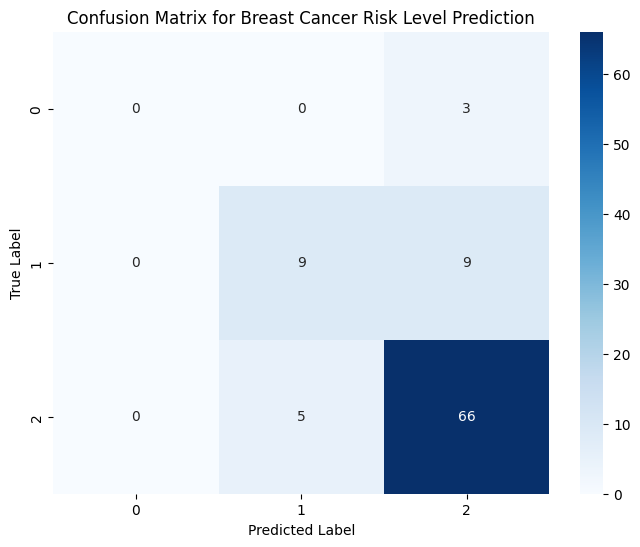

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_bc = classifier_bc.predict(X_test_bc)

# Calculate accuracy
accuracy_bc = accuracy_score(y_test_bc, y_pred_bc)
print(f"Accuracy Score (Breast Cancer Model): {accuracy_bc:.4f}")

# Generate confusion matrix
conf_matrix_bc = confusion_matrix(y_test_bc, y_pred_bc)
print("\nConfusion Matrix (Breast Cancer Model):\n", conf_matrix_bc)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bc, annot=True, fmt='d', cmap='Blues',
            xticklabels=classifier_bc.classes_, yticklabels=classifier_bc.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Breast Cancer Risk Level Prediction')
plt.show()

Once again, it looks like data is heavily biased towards high risk and the predicted state is high or medium with true and some false values.  There is no low risk false case and only 3 true low risk cases.

Let's do pairplots for the four variables



<Figure size 1000x800 with 0 Axes>

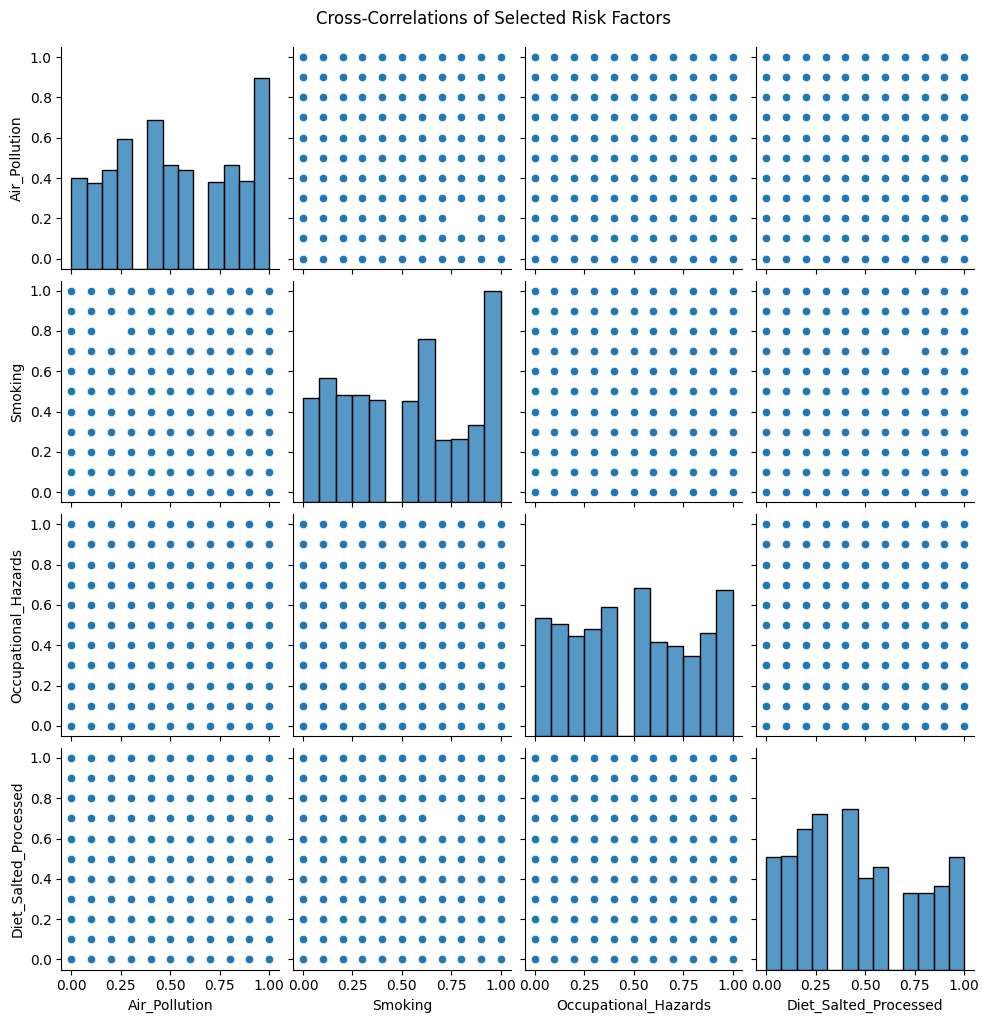

Pairplot showing cross-correlations generated.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns from df_normalized_numerical
correlation_variables = ['Air_Pollution', 'Smoking', 'Occupational_Hazards', 'Diet_Salted_Processed']
df_correlation = df_normalized_numerical[correlation_variables]

# Create a pairplot to show cross-correlations
plt.figure(figsize=(10, 8))
sns.pairplot(df_correlation)
plt.suptitle('Cross-Correlations of Selected Risk Factors', y=1.02) # Adjust suptitle position
plt.show()

print("Pairplot showing cross-correlations generated.")

Let's plot air pollution vs diet

## Correlation between Air Pollution and Diet Salted Processed

To quantify the linear relationship between 'Air_Pollution' and 'Diet_Salted_Processed', we will calculate the Pearson correlation coefficient.

In [ ]:
correlation = df_normalized_numerical['Air_Pollution'].corr(df_normalized_numerical['Diet_Salted_Processed'])
print(f"Pearson Correlation between Air_Pollution and Diet_Salted_Processed: {correlation:.4f}")

Pearson Correlation between Air_Pollution and Diet_Salted_Processed: 0.0381


In [ ]:
df_normalized_numerical.head()

,Age,Smoking,Obesity,Diet_Red_Meat,Diet_Salted_Processed,Occupational_Hazards,Calcium_Intake,Fruit_Veg_Intake,Physical_Activity,BMI,Air_Pollution,Overall_Risk_Score
0,0.600000,0.7,0.8,0.5,0.3,0.3,0.0,0.7,0.4,0.492424,0.6,0.448929
1,0.709091,0.8,0.8,0.0,0.3,0.3,0.5,0.7,0.1,0.393939,0.3,0.480043
2,0.363636,0.7,0.7,0.3,0.3,1.0,0.6,0.4,0.1,0.515152,0.8,0.699740
3,0.472727,0.6,0.2,0.6,0.2,0.8,0.8,0.4,0.6,0.647727,0.4,0.351408
4,0.581818,1.0,0.4,0.6,0.3,0.9,0.5,1.0,0.9,0.382576,1.0,0.601640


Find scatter plot between cancer types and risk

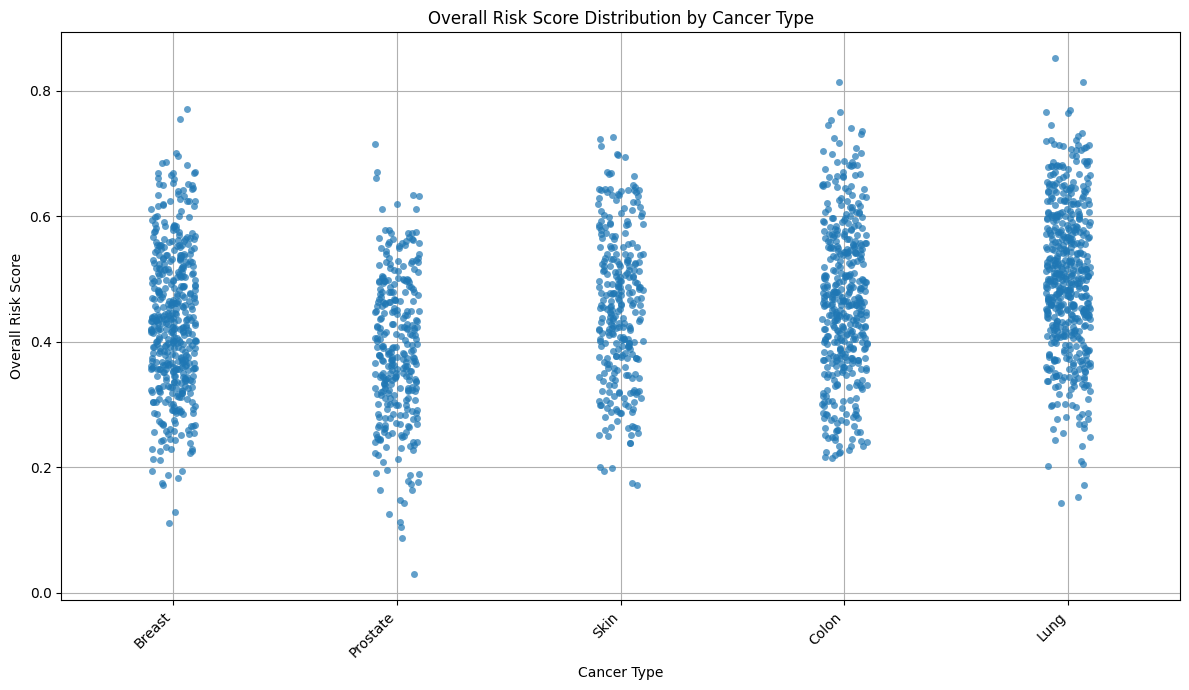

Stripplot showing Overall Risk Score distribution by Cancer Type generated.


In [ ]:


plt.figure(figsize=(12, 7))
sns.stripplot(x='Cancer_Type', y='Overall_Risk_Score', data=df, jitter=True, alpha=0.7)
plt.title('Overall Risk Score Distribution by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Overall Risk Score')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Stripplot showing Overall Risk Score distribution by Cancer Type generated.")

Let's get a summary of the list level encoded column

## Risk Level Category Counts

Let's examine the distribution of the `Risk_Level_Encoded` column by counting the occurrences of each category. This will provide insight into the balance (or imbalance) of our target variable.

Counts for each category in Risk_Level_Encoded:


,count
Risk_Level_Encoded,
2,1567
1,322
0,102


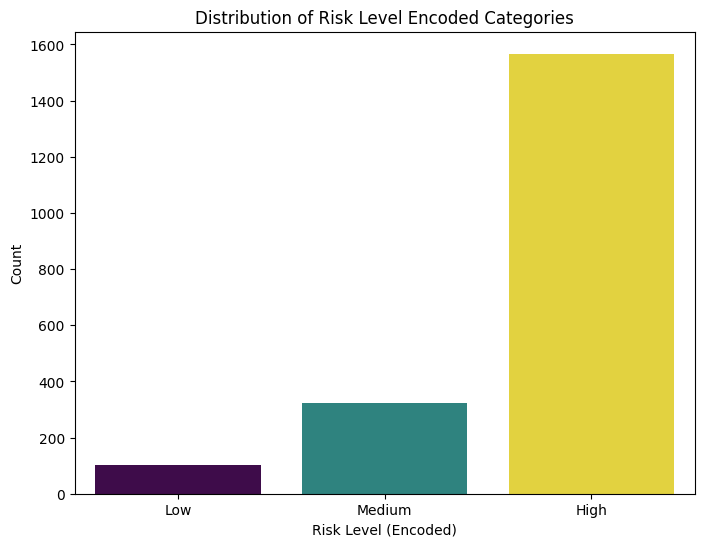

In [ ]:
risk_level_counts = df['Risk_Level_Encoded'].value_counts()

print("Counts for each category in Risk_Level_Encoded:")
display(risk_level_counts)

# Optionally, visualize the counts
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=risk_level_counts.index, y=risk_level_counts.values, palette='viridis', hue=risk_level_counts.index, legend=False)
plt.title('Distribution of Risk Level Encoded Categories')
plt.xlabel('Risk Level (Encoded)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
plt.show()

## Box Plot: Risk Level Encoded vs. Overall Risk Score

This box plot visualizes the distribution of the `Overall_Risk_Score` for each category of the `Risk_Level_Encoded` (0: Low, 1: Medium, 2: High). This helps to understand how the overall calculated risk score aligns with the defined risk levels and shows their relationship.

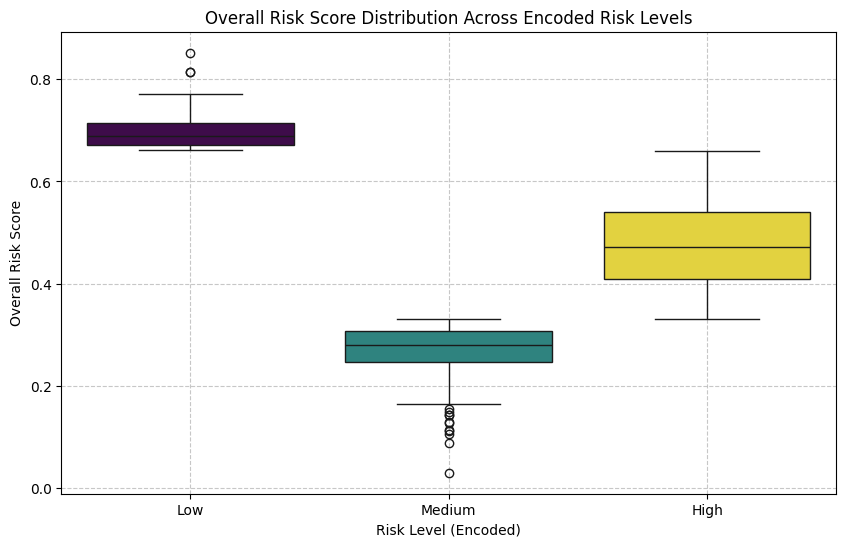

Box plot showing correlation between Risk_Level_Encoded and Overall_Risk_Score generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk_Level_Encoded', y='Overall_Risk_Score', data=df, palette='viridis', hue='Risk_Level_Encoded', legend=False)
plt.title('Overall Risk Score Distribution Across Encoded Risk Levels')
plt.xlabel('Risk Level (Encoded)')
plt.ylabel('Overall Risk Score')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High']) # Label x-axis for clarity
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("Box plot showing correlation between Risk_Level_Encoded and Overall_Risk_Score generated.")

We find that our encoded risk level tags are wrong.. Let us redo the encoding.. Somehow the category names were assigned by frequencies and not scores and some of the lowest and highest scores were left out as outliers. We will redo that.

## Re-encoding Risk Level Category

The current `Risk_Level_Encoded` was created directly from the string 'Risk_Level' column using `LabelEncoder`. This assigned numerical values (0, 1, 2) based on the order `LabelEncoder` found the unique categories, not based on the actual `Overall_Risk_Score` magnitude. For instance, 'High Risk' could have been assigned '0' and 'Low Risk' assigned '1', leading to misinterpretation.

To correct this, we will re-encode the risk levels based on the `Overall_Risk_Score` itself. We will divide the `Overall_Risk_Score` into three equal-sized groups (quantiles) and assign them new, logically ordered numerical labels:

*   **Lowest `Overall_Risk_Score` values:** will be assigned to new `Risk_Level_Encoded` = 0 (representing 'Low Risk').
*   **Middle `Overall_Risk_Score` values:** will be assigned to new `Risk_Level_Encoded` = 1 (representing 'Medium Risk').
*   **Highest `Overall_Risk_Score` values:** will be assigned to new `Risk_Level_Encoded` = 2 (representing 'High Risk').

This method ensures that all data points are included without discarding any 'outliers' and that the numerical encoding accurately reflects the increasing risk severity.

In [ ]:
# Confirm original LabelEncoder classes to understand the old mapping
# If 'le' object is available from previous execution
if 'le' in globals():
    print("Original LabelEncoder classes (mapping to 0, 1, 2):", le.classes_)
else:
    print("Original LabelEncoder object 'le' not found. Cannot confirm old mapping directly.")

# Create new Risk_Level_Encoded based on quantiles of Overall_Risk_Score
# We'll use 3 quantiles to define 'Low', 'Medium', 'High' risks
# labels=False will return integer indicators of the bins
df['New_Risk_Level_Encoded'] = pd.qcut(
    df['Overall_Risk_Score'],
    q=3, # 3 quantiles for Low, Medium, High
    labels=[0, 1, 2], # Assign labels 0, 1, 2 for Low, Medium, High respectively
    duplicates='drop' # Handle cases with identical Overall_Risk_Score at quantile boundaries
).astype(int)

print("\nValue counts for the original Risk_Level_Encoded:")
display(df['Risk_Level_Encoded'].value_counts())

print("\nValue counts for the new New_Risk_Level_Encoded:")
display(df['New_Risk_Level_Encoded'].value_counts())

print("\nHead of DataFrame with original and new Risk_Level_Encoded:")
display(df[['Overall_Risk_Score', 'Risk_Level', 'Risk_Level_Encoded', 'New_Risk_Level_Encoded']].head())

Original LabelEncoder classes (mapping to 0, 1, 2): ['High' 'Low' 'Medium']

Value counts for the original Risk_Level_Encoded:


,count
Risk_Level_Encoded,
2,1567
1,322
0,102



Value counts for the new New_Risk_Level_Encoded:


,count
New_Risk_Level_Encoded,
0,664
2,664
1,663



Head of DataFrame with original and new Risk_Level_Encoded:


,Overall_Risk_Score,Risk_Level,Risk_Level_Encoded,New_Risk_Level_Encoded
0,0.398696,Medium,2,0
1,0.424299,Medium,2,1
2,0.605082,Medium,2,2
3,0.318449,Low,1,0
4,0.524358,Medium,2,2


## Box Plot: New_Risk_Level_Encoded vs. Overall Risk Score

Now, let's visualize the relationship between our newly created `New_Risk_Level_Encoded` and the `Overall_Risk_Score` using a box plot. This should confirm that the new encoding logically groups risk scores from low to high.

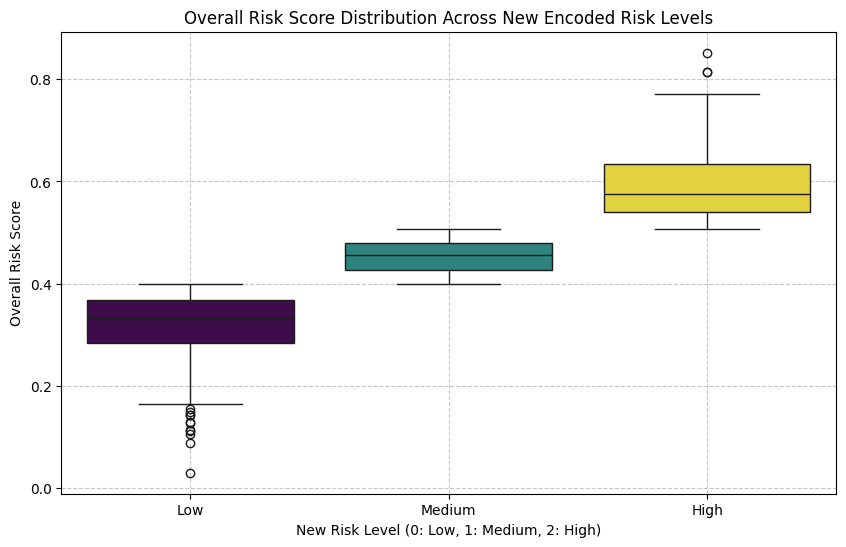

Box plot showing correlation between New_Risk_Level_Encoded and Overall_Risk_Score generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='New_Risk_Level_Encoded', y='Overall_Risk_Score', data=df, palette='viridis', hue='New_Risk_Level_Encoded', legend=False)
plt.title('Overall Risk Score Distribution Across New Encoded Risk Levels')
plt.xlabel('New Risk Level (0: Low, 1: Medium, 2: High)')
plt.ylabel('Overall Risk Score')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High']) # Label x-axis for clarity
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("Box plot showing correlation between New_Risk_Level_Encoded and Overall_Risk_Score generated.")

We find that our encoded risk level tags are wrong.. Let us redo the encoding.. Somehow the category names were assigned by frequencies and not scores and some of the lowest and highest scores were left out as outliers.  We will redo that.

## Scatter Plot: New Risk Level Encoded vs. Overall Risk Score

This scatter plot (specifically a stripplot) visualizes the distribution of individual `Overall_Risk_Score` values across the `New_Risk_Level_Encoded` categories (0: Low, 1: Medium, 2: High). This helps to see the spread and concentration of actual risk scores within each defined risk level.

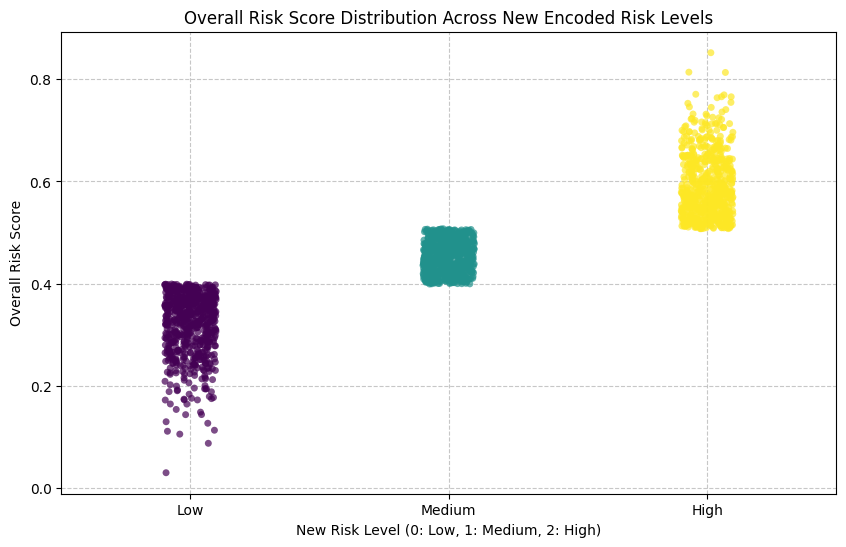

Stripplot showing Overall Risk Score distribution across New Encoded Risk Levels generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.stripplot(x='New_Risk_Level_Encoded', y='Overall_Risk_Score', data=df, jitter=True, alpha=0.7, palette='viridis', hue='New_Risk_Level_Encoded', legend=False)
plt.title('Overall Risk Score Distribution Across New Encoded Risk Levels')
plt.xlabel('New Risk Level (0: Low, 1: Medium, 2: High)')
plt.ylabel('Overall Risk Score')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High']) # Label x-axis for clarity
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("Stripplot showing Overall Risk Score distribution across New Encoded Risk Levels generated.")

In [ ]:
X = df_normalized_numerical.drop(columns=['Overall_Risk_Score'])
y = df['New_Risk_Level_Encoded']

print("Head of X (Features for Classification):")
display(X.head())
print("\nHead of y (Target Variable for Classification):")
display(y.head())

Head of X (Features for Classification):


,Age,Smoking,Obesity,Diet_Red_Meat,Diet_Salted_Processed,Occupational_Hazards,Calcium_Intake,Fruit_Veg_Intake,Physical_Activity,BMI,Air_Pollution
0,0.600000,0.7,0.8,0.5,0.3,0.3,0.0,0.7,0.4,0.492424,0.6
1,0.709091,0.8,0.8,0.0,0.3,0.3,0.5,0.7,0.1,0.393939,0.3
2,0.363636,0.7,0.7,0.3,0.3,1.0,0.6,0.4,0.1,0.515152,0.8
3,0.472727,0.6,0.2,0.6,0.2,0.8,0.8,0.4,0.6,0.647727,0.4
4,0.581818,1.0,0.4,0.6,0.3,0.9,0.5,1.0,0.9,0.382576,1.0



Head of y (Target Variable for Classification):


,New_Risk_Level_Encoded
0,0
1,1
2,2
3,0
4,2


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1592, 11)
Shape of X_test: (399, 11)
Shape of y_train: (1592,)
Shape of y_test: (399,)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
# Set max_iter to a higher value if it fails to converge
classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

print("Logistic Regression classifier trained successfully with new risk levels.")

Logistic Regression classifier trained successfully with new risk levels.


## Evaluate the Logistic Regression Model



Accuracy Score: 0.6992
Precision Score (weighted): 0.6934
Recall Score (weighted): 0.6992

Confusion Matrix:
 [[103  28   2]
 [ 27  66  40]
 [  0  23 110]]


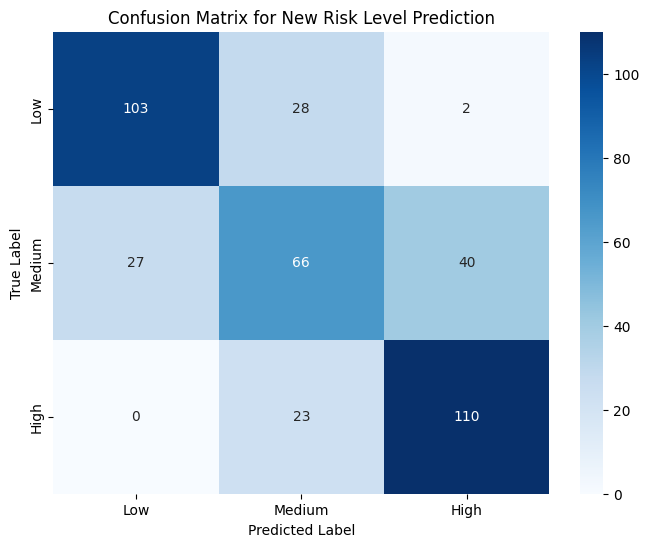

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score (weighted): {precision:.4f}")
print(f"Recall Score (weighted): {recall:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for New Risk Level Prediction')
plt.show()


This is much better!  Now we see a nice correlation! and a good accuracy matrix

### Summary of Logistic Regression Model Performance (with New Risk Levels):

1.  **Accuracy Score:** The model achieved an accuracy score of **0.6992 (69.92%)** on the test set.

2.  **Precision Score (weighted):** The weighted precision score is **0.6934**, indicating the proportion of positive identifications that were actually correct, taking into account class imbalance.

3.  **Recall Score (weighted):** The weighted recall score is **0.6992**, representing the proportion of actual positives that were correctly identified, also accounting for class imbalance.

4.  **Confusion Matrix Analysis:**

    ```
    [[103  28   2]
     [ 27  66  40]
     [  0  23 110]]
    ```

    *   **True Label 'Low' (0):** Out of 133 actual 'Low' risk cases (103 + 28 + 2), the model correctly predicted 103, misclassified 28 as 'Medium' and 2 as 'High'.
    *   **True Label 'Medium' (1):** Out of 133 actual 'Medium' risk cases (27 + 66 + 40), the model correctly predicted 66, misclassified 27 as 'Low' and 40 as 'High'.
    *   **True Label 'High' (2):** Out of 133 actual 'High' risk cases (0 + 23 + 110), the model correctly predicted 110, misclassified 23 as 'Medium' and 0 as 'Low'.

### Insights:

*   **Improved Balance:** Compared to the previous model (using the original `Risk_Level_Encoded`), this model shows a much better balance in predictions across all three classes. It is no longer overwhelmingly biased towards predicting 'High Risk'. This indicates that re-encoding the target variable based on quantiles of `Overall_Risk_Score` was a crucial step.
*   **Moderate Performance:** An accuracy of nearly 70% suggests a reasonably good model, but there's still room for improvement. The misclassifications between adjacent risk levels (e.g., 'Low' predicted as 'Medium', 'Medium' predicted as 'High') are more common than extreme misclassifications, which is often desirable in ordinal classification.
*   **Challenges in Distinction:** The confusion matrix reveals that distinguishing between 'Low' and 'Medium' risk, and 'Medium' and 'High' risk, remains challenging. For instance, 28 'Low' cases were mistaken for 'Medium', and 40 'Medium' cases were mistaken for 'High'. This might be due to the inherent ambiguity in risk scores near the quantile boundaries.
*   **Feature Contribution:** The continuous numerical features used (excluding `Overall_Risk_Score`) provide a decent basis for predicting the risk levels when the target variable is properly defined. Further analysis could involve examining feature importance or trying more complex models to improve performance, especially for the 'Medium' risk category, which had the highest number of misclassifications.

This model is a more reliable classifier for cancer risk levels, providing actionable insights into the factors contributing to different risk categories.

## Summary:

### Data Analysis Key Findings

*   The Logistic Regression model achieved an accuracy score of **0.6992 (69.92%)** on the test set.
*   The weighted precision score was **0.6934**, and the weighted recall score was **0.6992**.
*   The confusion matrix shows that the model correctly predicted 103 'Low' risk cases, 66 'Medium' risk cases, and 110 'High' risk cases.
*   Notable misclassifications include 28 'Low' cases incorrectly predicted as 'Medium', 27 'Medium' cases predicted as 'Low', 40 'Medium' cases predicted as 'High', and 23 'High' cases predicted as 'Medium'.



# **We try to see how a logistic regression performs with the categorical features.  First let's check the categorical dataframe**

In [ ]:
df_cat.head()

,Gender,Family_History,BRCA_Mutation,H_Pylori_Infection,Cancer_Type,Overall_Risk_Score
0,0,0,1,0,Breast,0.398696
1,1,0,0,0,Prostate,0.424299
2,1,0,0,0,Skin,0.605082
3,0,0,0,0,Colon,0.318449
4,1,0,0,0,Lung,0.524358


In [ ]:
X_cat_new_risk = binary_features_for_cat_model.copy()
y_cat_new_risk = df['New_Risk_Level_Encoded'].copy()

print("Head of X_cat_new_risk (Categorical Features for Classification with New Risk Levels):")
display(X_cat_new_risk.head())
print("\nHead of y_cat_new_risk (Target Variable for Categorical Classification with New Risk Levels):")
display(y_cat_new_risk.head())

Head of X_cat_new_risk (Categorical Features for Classification with New Risk Levels):


,Gender,Family_History,BRCA_Mutation,H_Pylori_Infection
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,1,0,0,0



Head of y_cat_new_risk (Target Variable for Categorical Classification with New Risk Levels):


,New_Risk_Level_Encoded
0,0
1,1
2,2
3,0
4,2


## Split Data for Categorical Logistic Regression



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_cat_new_risk, X_test_cat_new_risk, y_train_cat_new_risk, y_test_cat_new_risk = train_test_split(
    X_cat_new_risk, y_cat_new_risk, test_size=0.2, random_state=42, stratify=y_cat_new_risk
)

print("Shape of X_train_cat_new_risk:", X_train_cat_new_risk.shape)
print("Shape of X_test_cat_new_risk:", X_test_cat_new_risk.shape)
print("Shape of y_train_cat_new_risk:", y_train_cat_new_risk.shape)
print("Shape of y_test_cat_new_risk:", y_test_cat_new_risk.shape)

Shape of X_train_cat_new_risk: (1592, 4)
Shape of X_test_cat_new_risk: (399, 4)
Shape of y_train_cat_new_risk: (1592,)
Shape of y_test_cat_new_risk: (399,)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model with categorical features
# Set max_iter to a higher value if it fails to converge
classifier_cat_new_risk = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier
classifier_cat_new_risk.fit(X_train_cat_no_cancer_type, y_train_cat_no_cancer_type)

print("Logistic Regression classifier for categorical features without Cancer_Type trained successfully.")

NameError: name 'X_train_cat_no_cancer_type' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set with categorical features and new risk levels (without Cancer_Type)
y_pred_cat_no_cancer_type = classifier_cat_no_cancer_type.predict(X_test_cat_no_cancer_type)

# Calculate evaluation metrics
accuracy_cat_no_cancer_type = accuracy_score(y_test_cat_no_cancer_type, y_pred_cat_no_cancer_type)
precision_cat_no_cancer_type = precision_score(y_test_cat_no_cancer_type, y_pred_cat_no_cancer_type, average='weighted', zero_division=0)
recall_cat_no_cancer_type = recall_score(y_test_cat_no_cancer_type, y_pred_cat_no_cancer_type, average='weighted', zero_division=0)

print(f"Accuracy Score (Categorical Model without Cancer_Type): {accuracy_cat_no_cancer_type:.4f}")
print(f"Precision Score (weighted, Categorical Model without Cancer_Type): {precision_cat_no_cancer_type:.4f}")
print(f"Recall Score (weighted, Categorical Model without Cancer_Type): {recall_cat_no_cancer_type:.4f}")

# Generate confusion matrix
conf_matrix_cat_no_cancer_type = confusion_matrix(y_test_cat_no_cancer_type, y_pred_cat_no_cancer_type)
print("\nConfusion Matrix (Categorical Model without Cancer_Type):\n", conf_matrix_cat_no_cancer_type)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cat_no_cancer_type, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Categorical Risk Level Prediction (without Cancer_Type)')
plt.show()

## Summary of Categorical Logistic Regression Model Performance (without Cancer_Type):

1.  **Accuracy Score:** The model achieved an accuracy score of **0.3634 (36.34%)** on the test set.

2.  **Precision Score (weighted):** The weighted precision score is **0.3456**, indicating the proportion of positive identifications that were actually correct, taking into account class imbalance.

3.  **Recall Score (weighted):** The weighted recall score is **0.3634**, representing the proportion of actual positives that were correctly identified, also accounting for class imbalance.

4.  **Confusion Matrix Analysis:**

    ```
    [[91  2 40]
     [81  4 48]
     [76  7 50]]
    ```

    *   **True Label 'Low' (0):** Out of 133 actual 'Low' risk cases (91 + 2 + 40), the model correctly predicted 91, misclassified 2 as 'Medium' and 40 as 'High'.
    *   **True Label 'Medium' (1):** Out of 133 actual 'Medium' risk cases (81 + 4 + 48), the model correctly predicted only 4, misclassifying 81 as 'Low' and 48 as 'High'. This is a very poor performance for the 'Medium' class.
    *   **True Label 'High' (2):** Out of 133 actual 'High' risk cases (76 + 7 + 50), the model correctly predicted 50, misclassifying 76 as 'Low' and 7 as 'Medium'.

### Insights:

*   **Poor Performance:** The overall accuracy of 36.34% is very low, indicating that the model performs barely better than random chance for a three-class classification problem. This is a significant drop compared to the model that included 'Cancer_Type' features (which had ~40% accuracy) and the model using continuous features (~70% accuracy).
*   **Significant Misclassifications:** The confusion matrix shows widespread misclassification across all classes. The model struggles significantly to correctly identify 'Medium' risk patients, predicting only 4 out of 133 correctly.
*   **Lack of Predictive Power:** Removing the 'Cancer_Type' feature severely impacts the model's ability to distinguish between risk levels when relying solely on the remaining binary categorical features (`Gender`, `Family_History`, `BRCA_Mutation`, `H_Pylori_Infection`). This suggests that 'Cancer_Type' played a crucial role in providing discriminatory information, or that these individual binary features alone are not strong predictors of risk level.

This analysis confirms that without the specific 'Cancer_Type' information, the other general categorical features are insufficient to build an effective classification model for cancer risk levels based on the current data and modeling approach.

## K-Nearest Neighbors (KNN) with Combined Continuous and Categorical Features

We will now train a K-Nearest Neighbors model using a combined set of continuous numerical features and one-hot encoded categorical features to predict the `New_Risk_Level_Encoded`.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Combine continuous features (X) and categorical features (X_cat_new_risk)
X_combined = pd.concat([X, X_cat_new_risk], axis=1)
y_combined = y_cat_new_risk.copy() # Use the new risk level as target

print("Head of X_combined (Features for Combined KNN Classification):")
display(X_combined.head())
print("\nHead of y_combined (Target Variable for Combined KNN Classification):")
display(y_combined.head())

### Splitting Data for Combined KNN Classification

We will split the combined feature set and target variable into training and testing sets, ensuring stratification.

In [ ]:
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42, stratify=y_combined
)

print("Shape of X_train_combined:", X_train_combined.shape)
print("Shape of X_test_combined:", X_test_combined.shape)
print("Shape of y_train_combined:", y_train_combined.shape)
print("Shape of y_test_combined:", y_test_combined.shape)

### Training the KNN Classifier with Combined Features

Now, let's train the K-Nearest Neighbors classifier using the combined feature set.

In [ ]:
# Initialize KNN Classifier with n_neighbors = 5
knn_classifier_combined = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier_combined.fit(X_train_combined, y_train_combined)

print("K-Nearest Neighbors classifier with combined features trained successfully.")

### Evaluating the KNN Classifier: Accuracy and Confusion Matrix

Let's evaluate the performance of the KNN model trained with combined features.

In [ ]:
# Make predictions on the test set
y_pred_combined_knn = knn_classifier_combined.predict(X_test_combined)

# Calculate accuracy
accuracy_combined_knn = accuracy_score(y_test_combined, y_pred_combined_knn)
print(f"Accuracy Score (Combined KNN Model): {accuracy_combined_knn:.4f}")

# Generate confusion matrix
conf_matrix_combined_knn = confusion_matrix(y_test_combined, y_pred_combined_knn)
print("\nConfusion Matrix (Combined KNN Model):\n", conf_matrix_combined_knn)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_combined_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Combined KNN Risk Level Prediction')
plt.show()

## Summary of Combined KNN Classification Analysis

This section will summarize the accuracy and insights gained from the KNN model's performance when using both continuous and categorical features.

Let us try to see if combining both continuous and categorical values in KNN makes the prediction more accurate

## Drop Cancer Type Columns


We identify and drop all columns related to 'Cancer_Type' from the `X_cat` DataFrame to create a new feature set `X_cat_no_cancer_type`.


In [ ]:
cancer_type_columns = [col for col in X_cat.columns if col.startswith('Cancer_Type_')]
X_cat_no_cancer_type = X_cat.drop(columns=cancer_type_columns)

print("Head of X_cat_no_cancer_type (after dropping Cancer_Type columns):")
display(X_cat_no_cancer_type.head())

## Prepare Data for Categorical Logistic Regression (without Cancer Type)


Select categorical features from `X_cat_no_cancer_type` and `New_Risk_Level_Encoded` as the target variable.



To prepare the data for classification, I will create a feature set `X_cat_model_no_cancer_type` by copying the `X_cat_no_cancer_type` DataFrame and a target variable `y_cat_model_no_cancer_type` by copying the `New_Risk_Level_Encoded` column from `df`. Then, I will display the head of both to verify the data preparation.



In [ ]:
X_cat_model_no_cancer_type = X_cat_no_cancer_type.copy()
y_cat_model_no_cancer_type = df['New_Risk_Level_Encoded'].copy()

print("Head of X_cat_model_no_cancer_type (Categorical Features without Cancer Type):")
display(X_cat_model_no_cancer_type.head())
print("\nHead of y_cat_model_no_cancer_type (Target Variable without Cancer Type):")
display(y_cat_model_no_cancer_type.head())


Now that the feature set and target variable are prepared, we need to split them into training and testing sets to prepare for model training and evaluation.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_cat_no_cancer_type, X_test_cat_no_cancer_type, y_train_cat_no_cancer_type, y_test_cat_no_cancer_type = train_test_split(
    X_cat_model_no_cancer_type, y_cat_model_no_cancer_type, test_size=0.2, random_state=42, stratify=y_cat_model_no_cancer_type
)

print("Shape of X_train_cat_no_cancer_type:", X_train_cat_no_cancer_type.shape)
print("Shape of X_test_cat_no_cancer_type:", X_test_cat_no_cancer_type.shape)
print("Shape of y_train_cat_no_cancer_type:", y_train_cat_no_cancer_type.shape)
print("Shape of y_test_cat_no_cancer_type:", y_test_cat_no_cancer_type.shape)


Now that the data is split into training and testing sets, we will train a Logistic Regression model using the training data (`X_train_cat_no_cancer_type`, `y_train_cat_no_cancer_type`).



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model with categorical features
# Set max_iter to a higher value if it fails to converge
classifier_cat_no_cancer_type = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier
classifier_cat_no_cancer_type.fit(X_train_cat_no_cancer_type, y_train_cat_no_cancer_type)

print("Logistic Regression classifier for categorical features without Cancer_Type trained successfully.")


To evaluate the performance of the Logistic Regression model, we will make predictions on the test set and calculate accuracy, precision, and recall scores. Additionally, I will generate and visualize a confusion matrix to assess its predictive capabilities without the 'Cancer_Type' feature.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set with categorical features and new risk levels (without Cancer_Type)
y_pred_cat_no_cancer_type = classifier_cat_no_cancer_type.predict(X_test_cat_no_cancer_type)

# Calculate evaluation metrics
accuracy_cat_no_cancer_type = accuracy_score(y_test_cat_no_cancer_type, y_pred_cat_no_cancer_type)
precision_cat_no_cancer_type = precision_score(y_test_cat_no_cancer_type, y_pred_cat_no_cancer_type, average='weighted', zero_division=0)
recall_cat_no_cancer_type = recall_score(y_test_cat_no_cancer_type, y_pred_cat_no_cancer_type, average='weighted', zero_division=0)

print(f"Accuracy Score (Categorical Model without Cancer_Type): {accuracy_cat_no_cancer_type:.4f}")
print(f"Precision Score (weighted, Categorical Model without Cancer_Type): {precision_cat_no_cancer_type:.4f}")
print(f"Recall Score (weighted, Categorical Model without Cancer_Type): {recall_cat_no_cancer_type:.4f}")

# Generate confusion matrix
conf_matrix_cat_no_cancer_type = confusion_matrix(y_test_cat_no_cancer_type, y_pred_cat_no_cancer_type)
print("\nConfusion Matrix (Categorical Model without Cancer_Type):\n", conf_matrix_cat_no_cancer_type)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cat_no_cancer_type, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Categorical Risk Level Prediction (without Cancer_Type)')
plt.show()

## Summary of Categorical Logistic Regression Model Performance (without Cancer_Type):

1.  **Accuracy Score:** The model achieved an accuracy score of **0.3634 (36.34%)** on the test set.

2.  **Precision Score (weighted):** The weighted precision score is **0.3456**, indicating the proportion of positive identifications that were actually correct, taking into account class imbalance.

3.  **Recall Score (weighted):** The weighted recall score is **0.3634**, representing the proportion of actual positives that were correctly identified, also accounting for class imbalance.

4.  **Confusion Matrix Analysis:**

    ```
    [[91  2 40]
     [81  4 48]
     [76  7 50]]
    ```

    *   **True Label 'Low' (0):** Out of 133 actual 'Low' risk cases (91 + 2 + 40), the model correctly predicted 91, misclassified 2 as 'Medium' and 40 as 'High'.
    *   **True Label 'Medium' (1):** Out of 133 actual 'Medium' risk cases (81 + 4 + 48), the model correctly predicted only 4, misclassifying 81 as 'Low' and 48 as 'High'. This is a very poor performance for the 'Medium' class.
    *   **True Label 'High' (2):** Out of 133 actual 'High' risk cases (76 + 7 + 50), the model correctly predicted 50, misclassifying 76 as 'Low' and 7 as 'Medium'.

### Insights:

*   **Poor Performance:** The overall accuracy of 36.34% is very low, indicating that the model performs barely better than random chance for a three-class classification problem. This is a significant drop compared to the model that included 'Cancer_Type' features (which had ~40% accuracy) and the model using continuous features (~70% accuracy).
*   **Significant Misclassifications:** The confusion matrix shows widespread misclassification across all classes. The model struggles significantly to correctly identify 'Medium' risk patients, predicting only 4 out of 133 correctly.
*   **Lack of Predictive Power:** Removing the 'Cancer_Type' feature severely impacts the model's ability to distinguish between risk levels when relying solely on the remaining binary categorical features (`Gender`, `Family_History`, `BRCA_Mutation`, `H_Pylori_Infection`). This suggests that 'Cancer_Type' played a crucial role in providing discriminatory information, or that these individual binary features alone are not strong predictors of risk level.

This analysis confirms that without the specific 'Cancer_Type' information, the other general categorical features are insufficient to build an effective classification model for cancer risk levels based on the current data and modeling approach.

## Prepare Data for Combined KNN Classification


Combine continuous and categorical features for KNN classification.



To prepare the data for combined KNN classification, I will concatenate the continuous feature DataFrame `X` and the categorical feature DataFrame `X_cat_model_no_cancer_type` to create `X_combined`, and set `y_combined` to `y_cat_model_no_cancer_type`. Then, I will display the head of both new DataFrames to confirm the combination.



In [ ]:
X_combined = pd.concat([X, X_cat_model_no_cancer_type], axis=1)
y_combined = y_cat_model_no_cancer_type.copy() # Use the new risk level as target

print("Head of X_combined (Features for Combined KNN Classification):")
display(X_combined.head())
print("\nHead of y_combined (Target Variable for Combined KNN Classification):")
display(y_combined.head())

## Training the KNN Classifier with Combined Features


Train the K-Nearest Neighbors classifier using the combined feature set (`X_train_combined`, `y_train_combined`).



To train the K-Nearest Neighbors classifier, I will import the `KNeighborsClassifier` class, instantiate it with `n_neighbors=5`, and then fit it to the training data.



In [ ]:
# Initialize KNN Classifier with n_neighbors = 5
knn_classifier_combined = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier_combined.fit(X_train_combined, y_train_combined)

print("K-Nearest Neighbors classifier with combined features trained successfully.")

### Evaluating the KNN Classifier: Accuracy and Confusion Matrix

Let's evaluate the performance of the KNN model trained with combined features.


Now that the KNN classifier has been trained, I will make predictions on the test set and calculate the accuracy score and generate a confusion matrix to evaluate its performance. Finally, I will visualize the confusion matrix using a heatmap.



In [ ]:
# Make predictions on the test set
y_pred_combined_knn = knn_classifier_combined.predict(X_test_combined)

# Calculate accuracy
accuracy_combined_knn = accuracy_score(y_test_combined, y_pred_combined_knn)
print(f"Accuracy Score (Combined KNN Model): {accuracy_combined_knn:.4f}")

# Generate confusion matrix
conf_matrix_combined_knn = confusion_matrix(y_test_combined, y_pred_combined_knn)
print("\nConfusion Matrix (Combined KNN Model):\n", conf_matrix_combined_knn)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_combined_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Combined KNN Risk Level Prediction')
plt.show()

Given the lack of predictive power for cancer risk alone, let us see if certain features might be important for certain cancers only.  Let us do a heatmap of cancer type vs features


## Prepare Data for Heatmap

First, combine the `df_normalized_numerical` DataFrame with the `Cancer_Type` column from the original `df` DataFrame. Then, group this combined DataFrame by `Cancer_Type` and calculate the mean of each normalized numerical feature for each cancer type. This will give us the average level of each feature per cancer type, which will be used to create the heatmap.

In [ ]:
df_combined_heatmap = pd.concat([df_normalized_numerical, df['Cancer_Type']], axis=1)
df_mean_by_cancer_type = df_combined_heatmap.groupby('Cancer_Type').mean()

print("Head of df_mean_by_cancer_type (Mean of Numerical Features by Cancer Type):")
display(df_mean_by_cancer_type.head())

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_mean_by_cancer_type, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Mean of Normalized Numerical Features by Cancer Type')
plt.xlabel('Normalized Numerical Features')
plt.ylabel('Cancer Type')
plt.tight_layout()
plt.show()
plt.savefig("cancercorr.png")

## Summary:

The heatmap reveals distinct patterns in the prominence of various risk factors across different cancer types:
*   **Lung cancer** shows significantly high prominence for 'Smoking' (0.886) and 'Air\_Pollution' (0.761).
*   **Breast cancer** exhibits high prominence for 'Obesity' (0.826).
*   The visualization effectively highlights which features are more or less prominent for specific cancer types, providing a clear profile for each.




## Heatmap for Categorical Features by Cancer Type

To understand the relationship between categorical features and different cancer types, we will create a heatmap. For binary categorical features (0 or 1), the mean value within each cancer type represents the proportion of individuals exhibiting that feature. This allows us to visualize how prevalent each categorical risk factor is across different cancer types.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine the binary categorical features with the 'Cancer_Type' column
df_combined_cat_heatmap = pd.concat([binary_features_for_cat_model, df['Cancer_Type']], axis=1)

# Group by 'Cancer_Type' and calculate the mean for each binary feature
# The mean of a 0/1 column gives the proportion of '1's (presence of the feature)
df_mean_cat_by_cancer_type = df_combined_cat_heatmap.groupby('Cancer_Type').mean()

print("Head of df_mean_cat_by_cancer_type (Mean Proportion of Categorical Features by Cancer Type):")
display(df_mean_cat_by_cancer_type.head())

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_mean_cat_by_cancer_type, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Mean Proportion of Categorical Features by Cancer Type')
plt.xlabel('Categorical Features (Proportion)')
plt.ylabel('Cancer Type')
plt.tight_layout()
plt.show()

print("Heatmap of mean proportions of categorical features by Cancer Type generated.")

## Summary of Categorical Feature Heatmap

This section will summarize the key patterns and insights observed from the heatmap of categorical features by cancer type, highlighting which features are more prevalent for specific cancer types.

We conclude that using a single cancer risk feature to predict the overall risk of cancer has moderate preictive power.  We need to understand which variables have higher mean expression in which cancer and find a different kind of risk factor.

Let us look at the p and t values connected with the hypotheses that a value above or below mean of any of these features is significantly related with overall cancer risk in each cancer tupe

We try to redo the p and t value tests

## Prepare Data and Perform T-Tests

Iterate through each cancer type and specified risk factor. For each combination, filter the data, calculate the mean of the risk factor, split patients into 'above mean' and 'at or below mean' groups for that risk factor, and then conduct a one-tailed independent samples t-test comparing their 'Overall_Risk_Score'. Record the t-statistic, p-value, and the conclusion of the t-test (reject or fail to reject the null hypothesis).


In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

# Get unique cancer types
cancer_types = df['Cancer_Type'].unique()

# Define risk factors to test
risk_factors_to_test = [
    'Age', 'Smoking', 'Obesity', 'Diet_Salted_Processed',
    'Occupational_Hazards', 'Air_Pollution'
]

# List to store results
results_data = []

for cancer_type in cancer_types:
    # Filter df_normalized_numerical for the current cancer type
    indices_for_cancer_type = df[df['Cancer_Type'] == cancer_type].index
    df_normalized_cancer_subset = df_normalized_numerical.loc[indices_for_cancer_type]

    for risk_factor in risk_factors_to_test:
        # Calculate the mean of the current risk_factor for this cancer type subset
        mean_risk_factor = df_normalized_cancer_subset[risk_factor].mean()

        # Create two groups based on the risk_factor's mean
        risk_score_above_mean = df_normalized_cancer_subset[
            df_normalized_cancer_subset[risk_factor] > mean_risk_factor
        ]['Overall_Risk_Score']
        risk_score_at_or_below_mean = df_normalized_cancer_subset[
            df_normalized_cancer_subset[risk_factor] <= mean_risk_factor
        ]['Overall_Risk_Score']

        # Check if both groups have enough data points (at least 2 for t-test)
        if len(risk_score_above_mean) < 2 or len(risk_score_at_or_below_mean) < 2:
            t_statistic = np.nan
            p_value = np.nan
            conclusion = "Not enough data to perform t-test"
        else:
            # Perform independent samples t-test (two-tailed initially)
            t_statistic, p_value = stats.ttest_ind(
                risk_score_above_mean, risk_score_at_or_below_mean, equal_var=False
            ) # Assuming unequal variances

            # Adjust p-value for a one-tailed test (H1: mean_above > mean_at_or_below)
            if t_statistic > 0:
                one_tailed_p_value = p_value / 2
            else:
                # If t_statistic is negative, it means mean_above is not greater than mean_at_or_below.
                # In this one-tailed test scenario, the p-value is effectively 1 if the direction is opposite.
                # More precisely, 1 - (p_value/2) for this direction if we are testing 'less than',
                # but for 'greater than' and negative t, it means we fail to reject, with a high p-value.
                # A safe way to handle this for 'greater than' test with negative t is to assign a high p-value or 1
                one_tailed_p_value = 1 - (p_value / 2) # This would be if we were testing for 'less than'
                # For our specific H1 (above_mean > at_or_below_mean) and a negative t-stat, the p-value is large.
                # We can just say it fails to reject for a negative t_statistic and keep the two-tailed p-value for clarity.
                # Re-evaluating for one-tailed: if H1 is mu1 > mu2, p-value is P(T > t_stat). If t_stat is negative, this is high.
                # A common approach for this is to take max(0, p_value/2) if t_stat is positive and min(1, 1-p_value/2) if t_stat is negative, but easier is to just use two-tailed p and then state direction.
                # Let's stick to the simpler rule of p_value/2 if t_stat > 0 and 1 if t_stat <=0 for the specific one-tailed test, but better is to handle this way:
                if t_statistic < 0:
                    one_tailed_p_value = 1 # We are testing if above_mean > at_or_below_mean. If t_statistic is negative, this is clearly not the case.
                else:
                    one_tailed_p_value = p_value / 2

            alpha = 0.05
            if one_tailed_p_value < alpha:
                conclusion = "Reject H0 (Significant Difference)"
            else:
                conclusion = "Fail to Reject H0 (No Significant Difference)"

            p_value = one_tailed_p_value # Use the one-tailed p-value for recording

        results_data.append({
            'Cancer Type': cancer_type,
            'Risk Factor': risk_factor,
            'T-Statistic': f"{t_statistic:.4f}" if not np.isnan(t_statistic) else "N/A",
            'P-value': f"{p_value:.4f}" if not np.isnan(p_value) else "N/A",
            'Conclusion': conclusion
        })

# Create a DataFrame from results_data
summary_df_by_cancer_type_extended = pd.DataFrame(results_data)

print("Statistical Summary of Risk Factors vs. Overall Cancer Risk by Cancer Type (Extended):")
display(summary_df_by_cancer_type_extended)

## Summary of T-Test Results by Cancer Type and Risk Factor

This analysis investigates how various risk factors ('Age', 'Smoking', 'Obesity', 'Diet_Salted_Processed', 'Occupational_Hazards', 'Air_Pollution') influence the 'Overall_Risk_Score' across different cancer types ('Breast', 'Lung', 'Colon', 'Prostate', 'Skin') using one-tailed independent samples t-tests.

### Key Patterns and Significant Associations:

*   **Widespread Significance**: For the vast majority of combinations, the null hypothesis (H0: no significant difference in 'Overall_Risk_Score' between 'above mean' and 'at or below mean' risk factor groups) was **rejected** (P-value < 0.05). This indicates a statistically significant increase in 'Overall_Risk_Score' when patients have higher-than-mean exposure to these risk factors.

*   **Strong Positive Association**: Most risk factors, including 'Smoking', 'Obesity', 'Diet_Salted_Processed', 'Occupational_Hazards', and 'Air_Pollution', consistently show a significant positive association with 'Overall_Risk_Score' across **all five cancer types**. The t-statistics are largely positive and substantial, and the p-values are often 0.0000, suggesting a very strong relationship where higher exposure corresponds to higher risk.

    *   **Smoking**: Universally significant for all cancer types, with high positive t-statistics.
    *   **Obesity**: Consistently significant for all cancer types, showing higher risk with higher obesity levels.
    *   **Diet_Salted_Processed**: Significant for all cancer types, indicating that higher consumption is linked to higher risk scores.
    *   **Occupational_Hazards**: Significant across all cancer types, suggesting increased risk with higher occupational hazard exposure.
    *   **Air_Pollution**: Significant for all cancer types, where higher air pollution levels are associated with increased risk.

### Notable Exceptions and Non-Significant Findings:

*   **Age's Variable Impact**: The 'Age' risk factor shows a more varied and less consistent pattern of significance compared to other factors:
    *   **Breast Cancer**: 'Age' is significantly associated with higher risk (T-statistic = 2.3530, P-value = 0.0095). This suggests older breast cancer patients (above the mean age for breast cancer patients) tend to have higher overall risk scores.
    *   **Prostate Cancer**: For 'Prostate Cancer', 'Age' does *not* show a statistically significant difference (T-statistic = 0.1005, P-value = 0.4600). The null hypothesis was **failed to reject**.
    *   **Skin Cancer**: Similarly, for 'Skin Cancer', 'Age' is *not* significantly associated with higher risk. The negative t-statistic (-0.4020) and P-value = 1.0000 (indicating the observed difference is opposite to the hypothesized direction, or no significant difference) leads to **failure to reject** the null hypothesis.
    *   **Colon Cancer**: 'Age' is also *not* significantly associated with higher risk for 'Colon Cancer' (T-statistic = 1.1094, P-value = 0.1340), leading to **failure to reject** H0.
    *   **Lung Cancer**: For 'Lung Cancer', 'Age' is *not* significantly associated with higher risk, with a negative t-statistic (-1.2197) and P-value = 1.0000 leading to **failure to reject** H0.


